In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import Normalizer 

from sklearn.metrics import f1_score ,average_precision_score ,roc_auc_score


from sklearn.model_selection import train_test_split



## Task 1 Title and Body (30Pts)

Use CountVectorizer with the default settings and train a linear classifier. Visualize the 20 most
important features in the linear model. Tune the regularization parameter of the classifier, and
visualize the 20 most important features after regularization.
Do this for all 4 settings. Which one works best?
For the simplicity, for the remaining tasks, we will work with option 3), concatenating the texts.

In [3]:
train_main = pd.read_csv('hw5_data_train.csv')
test_main = pd.read_csv('hw5_data_test.csv')

In [4]:
train, test, y_train,y_test = train_test_split(train_main, train_main["Recommended"] , stratify = train_main["Recommended"] )

In [5]:
print('train = ',train.shape,'\ntest = ',test.shape)

train =  (13210, 3) 
test =  (4404, 3)


In [6]:
train.head()

,Title,Review,Recommended
8972,Polished and comfort,I'm 5' 120 lbs. i'm posting a photo. one lady ...,1
5743,NaN,"Cute pattern, but the shirt is very thin and r...",0
14489,Great tee but kind of short,I love this tee but there is a lot of swing/ f...,1
12722,"Light weight, pockets, great for summer","I run 170lbs., 36 d, 5'4"" and ordered a regula...",1
13720,Love it!,This is a love at first sight item! bought tha...,1


In [7]:
test.head()

,Title,Review,Recommended
15950,Wanted to love,"I like the feel, stretch and softness of this ...",1
13191,Romantic ruffled tee,This ruffle tee is adorable on. the fabric is ...,1
815,NaN,My absolute favorite dress yet from retailer! ...,1
15963,Extremely long!,"Lovely fabric, color and embellishment but thi...",0
4352,NaN,NaN,1


In [9]:
print(train['Recommended'].unique())
print(test['Recommended'].unique())

[1 0]
[1 0]


#### 1) Use the title only

In [79]:
train1_clean = train[['Title','Recommended']].dropna(thresh=2).reset_index(drop=True)
test1_clean = test[['Title','Recommended']].dropna(thresh=2).reset_index(drop=True)
test_main_clean = test_main.dropna(thresh=3).reset_index(drop=True)

print(train1_clean.shape,'\n',test1_clean.shape)

(11050, 2) 
 (3712, 2)


In [11]:
train1_clean.head()

,Title,Recommended
0,Polished and comfort,1
1,Great tee but kind of short,1
2,"Light weight, pockets, great for summer",1
3,Love it!,1
4,Great tank,1


In [12]:
#default params
vect = CountVectorizer()
X_train1 = vect.fit_transform(train1_clean['Title'])
y_train1 = train1_clean['Recommended']
X_test1 = vect.transform(test1_clean['Title'])
y_test1 = test1_clean['Recommended']
feature_names1 = vect.get_feature_names()
logreg1 = LogisticRegression()
logreg1.fit(X_train1,y_train1)
logreg1.score(X_test1,y_test1)

0.8841594827586207

In [33]:
print("Test Avg Precision score: ", average_precision_score(logreg1.predict(X_test1),y_test1))
print("Test F1 score: ", f1_score(logreg1.predict(X_test1),y_test1))
print("Test ROC AUC score: ", roc_auc_score(logreg1.predict(X_test1),y_test1))

Test Avg Precision score:  0.9551239006003072
Test F1 score:  0.931637519872814
Test ROC AUC score:  0.8317216117216116


In [34]:
logreg1.predict_proba(X_test1)[:,1].shape

(3712,)

In [35]:
y_test1.shape

(3712,)

In [36]:
logreg1.predict(X_test1)

array([0, 1, 1, ..., 1, 1, 1])

In [37]:
logreg1.coef_[0]

array([0.32600424, 0.15703178, 0.01834088, ..., 0.04485997, 0.27864637,
       0.2054593 ])

In [38]:
colour = []
for i in range(40):
    if i < 20:
        colour.append("red")
    else:
        colour.append("blue")
    
def plot(coef,feature_names,i): #plots top 20 features
    top20_index_pos = coef.argsort()[-20:] #top 20 coefficient index values from logreg.coef_ array
    top20_pos = coef[top20_index_pos]
    print (top20_pos)
    top20_names_pos = [feature_names[j] for j in top20_index_pos] #gets top20 words from feature names
    print(top20_names_pos)
    top20_index_neg = coef.argsort()[:20] #top 20 coefficient index values from logreg.coef_ array
    top20_neg = coef[top20_index_neg]
    print (top20_neg)
    top20_names_neg = [feature_names[j] for j in top20_index_neg] #gets top20 words from feature names
    print(top20_names_neg)
    top_coef = np.hstack([top20_neg,top20_pos])
    print(top_coef)
    top_names = np.hstack([top20_names_neg,top20_names_pos])
    print(top_names)

    plt.figure(figsize=(20, 5))
    plt.bar(range(1,41),top_coef,color=colour)
    plt.title('20 most important features '+str(i))
    plt.xticks(range(1,41),top_names,rotation=45)
    plt.show()

[1.6637643  1.72086497 1.7251608  1.72656263 1.75077645 1.78615874
 1.79415638 1.79868038 1.80565145 1.86608629 1.93723367 1.98933469
 2.05337675 2.07103438 2.1139737  2.16293231 2.21704428 2.53364719
 2.6789018  2.74171166]
['yes', 'soft', 'elegant', 'perfection', 'great', 'lovely', 'exactly', 'easy', 'comfy', 'awesome', 'stunning', 'little', 'versatile', 'perfect', 'gorgeous', 'love', 'amazing', 'unique', 'fun', 'comfortable']
[-3.62612351 -3.25400363 -3.00306227 -2.8592     -2.75521636 -2.74582007
 -2.62089346 -2.42945102 -2.42943422 -2.39942369 -2.31466443 -2.28674242
 -2.21128699 -2.20845511 -2.14859382 -2.12010597 -2.09550886 -2.0752963
 -2.07430202 -2.04107484]
['wanted', 'disappointing', 'disappointed', 'unflattering', 'terrible', 'poor', 'cheap', 'tent', 'not', 'meh', 'horrible', 'disappointment', 'strange', 'sloppy', 'nope', 'didn', 'shapeless', 'huge', 'bad', 'until']
[-3.62612351 -3.25400363 -3.00306227 -2.8592     -2.75521636 -2.74582007
 -2.62089346 -2.42945102 -2.4294342

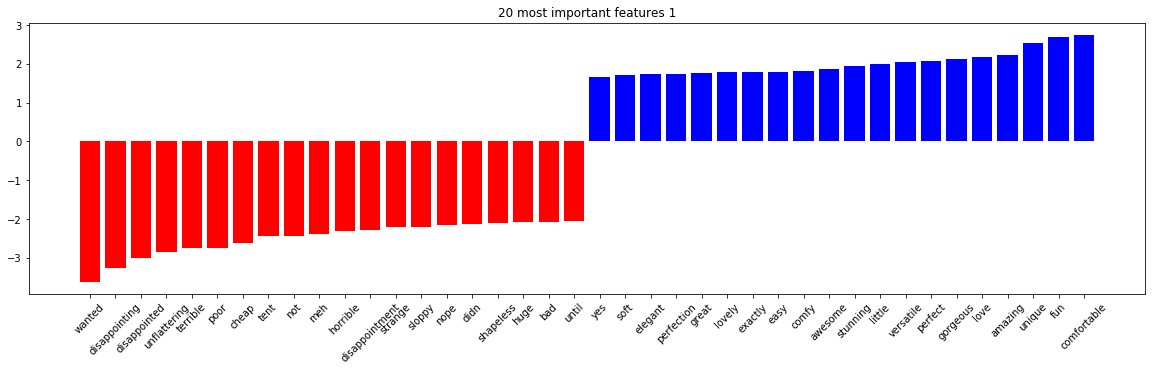

In [39]:
plot(logreg1.coef_[0],feature_names1,1)

In [40]:
#with CV
vect = CountVectorizer()
X_train1_cv = vect.fit_transform(train1_clean['Title'])
y_train1_cv = train1_clean['Recommended']
X_test1_cv = vect.transform(test1_clean['Title'])
y_test1_cv = test1_clean['Recommended']
feature_names1_cv = vect.get_feature_names()
logreg1_cv = LogisticRegressionCV(Cs = [1,1.1,1.15,1.2,1.23,1.4],scoring = 'average_precision')
logreg1_cv.fit(X_train1_cv,y_train1_cv)
print('test score:',logreg1_cv.score(X_test1_cv,y_test1_cv))

print('C:',logreg1_cv.C_)

test score: 0.8863146551724138
C: [1.4]


In [41]:
print("Test Avg Precision score: ", average_precision_score(logreg1_cv.predict(X_test1_cv),y_test1_cv))
print("Test F1 score: ", f1_score(logreg1_cv.predict(X_test1_cv),y_test1_cv))
print("Test ROC AUC score: ", roc_auc_score(logreg1_cv.predict(X_test1_cv),y_test1_cv))

Test Avg Precision score:  0.9534814520684715
Test F1 score:  0.932716836734694
Test ROC AUC score:  0.8327145214521452


In [42]:
logreg1_cv.coef_[0]

array([0.44520245, 0.18621353, 0.01923554, ..., 0.05363397, 0.36874779,
       0.26914387])

[1.85211092 1.85700219 1.87845086 1.90094082 1.92952731 1.93367427
 1.94032596 2.00882507 2.09102357 2.10425614 2.1259367  2.14274973
 2.20808238 2.23376288 2.2411036  2.26063203 2.40148789 2.7885481
 2.94626458 3.00228328]
['lovely', 'justice', 'comfy', 'stylish', 'perfection', 'yes', 'elegant', 'easy', 'stunning', 'exactly', 'awesome', 'perfect', 'little', 'gorgeous', 'love', 'versatile', 'amazing', 'unique', 'fun', 'comfortable']
[-3.77552319 -3.50848664 -3.16548859 -3.085218   -3.05631336 -2.91099903
 -2.90993033 -2.74027925 -2.72319525 -2.68920869 -2.57459576 -2.55471119
 -2.54788228 -2.44346546 -2.42514718 -2.36342277 -2.33295732 -2.32212651
 -2.31062199 -2.24901136]
['wanted', 'disappointing', 'disappointed', 'terrible', 'unflattering', 'poor', 'cheap', 'tent', 'disappointment', 'horrible', 'meh', 'sloppy', 'not', 'nope', 'strange', 'shapeless', 'didn', 'been', 'until', 'bad']
[-3.77552319 -3.50848664 -3.16548859 -3.085218   -3.05631336 -2.91099903
 -2.90993033 -2.74027925 -2.72

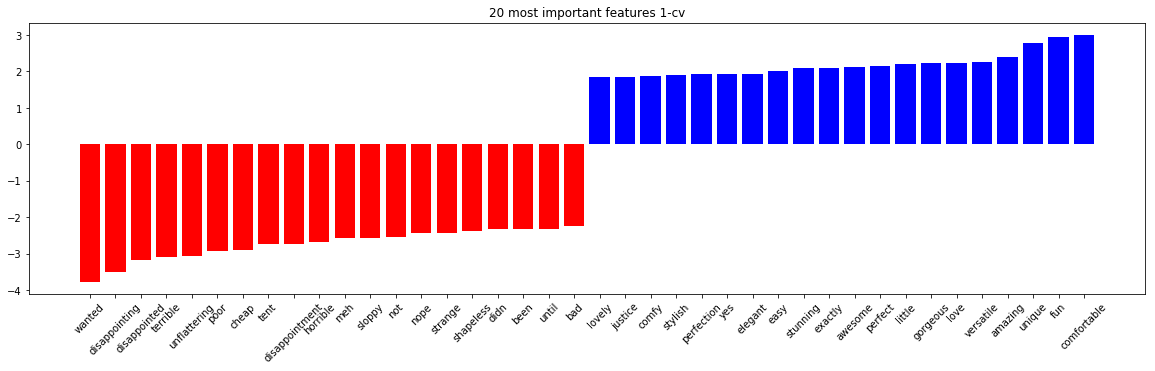

In [43]:
plot(logreg1_cv.coef_[0],feature_names1_cv,'1-cv')

#### 2) Use the review body only

In [44]:
train2_clean = train[['Review','Recommended']].dropna(thresh=2).reset_index(drop=True)
test2_clean = test[['Review','Recommended']].dropna(thresh=2).reset_index(drop=True)
print(train2_clean.shape,'\n',test2_clean.shape)

(12730, 2) 
 (4255, 2)


In [45]:
train2_clean.head()

,Review,Recommended
0,I'm 5' 120 lbs. i'm posting a photo. one lady ...,1
1,"Cute pattern, but the shirt is very thin and r...",0
2,I love this tee but there is a lot of swing/ f...,1
3,"I run 170lbs., 36 d, 5'4"" and ordered a regula...",1
4,This is a love at first sight item! bought tha...,1


In [46]:
#default params
vect = CountVectorizer()
X_train2 = vect.fit_transform(train2_clean['Review'])
y_train2 = train2_clean['Recommended']
X_test2 = vect.transform(test2_clean['Review'])
y_test2 = test2_clean['Recommended']
feature_names2 = vect.get_feature_names()
logreg2 = LogisticRegression()
logreg2.fit(X_train2,y_train2)
print('test score:',logreg2.score(X_test2,y_test2))

test score: 0.8883666274970623


In [47]:
print("Test Avg Precision score: ", average_precision_score(logreg2.predict(X_test2),y_test2))
print("Test F1 score: ", f1_score(logreg2.predict(X_test2),y_test2))
print("Test ROC AUC score: ", roc_auc_score(logreg2.predict(X_test2),y_test2))

Test Avg Precision score:  0.9380287120839738
Test F1 score:  0.9329569513055751
Test ROC AUC score:  0.8182703225199622


[1.24987213 1.25653994 1.26513218 1.26813569 1.27228432 1.28936762
 1.30713089 1.32212269 1.32945464 1.33049422 1.3353945  1.33997048
 1.35532278 1.36128194 1.38047574 1.39844168 1.44493411 1.44581705
 1.59597079 1.67359814]
['caution', 'happy', 'stunning', 'stylish', 'elegant', 'carry', 'commented', 'pleased', 'worried', 'sold', 'settle', 'adore', 'unique', 'tailored', 'chic', '36', 'paired', 'gathered', 'keeper', 'compliments']
[-1.89713073 -1.68637233 -1.62247135 -1.61134866 -1.57535022 -1.55799491
 -1.55258612 -1.5145909  -1.50987988 -1.47271513 -1.46875931 -1.4129493
 -1.40680356 -1.3996005  -1.39620444 -1.39415597 -1.38878765 -1.37955697
 -1.36638315 -1.3630607 ]
['shame', 'awful', 'cheap', 'weirdly', 'horrible', 'flowed', 'returned', 'poor', 'sack', 'ridiculous', 'disappointed', 'minutes', 'netting', 'unfortunate', 'relatively', 'returning', 'lay', 'pinks', 'shapeless', 'idea']
[-1.89713073 -1.68637233 -1.62247135 -1.61134866 -1.57535022 -1.55799491
 -1.55258612 -1.5145909  -1.5

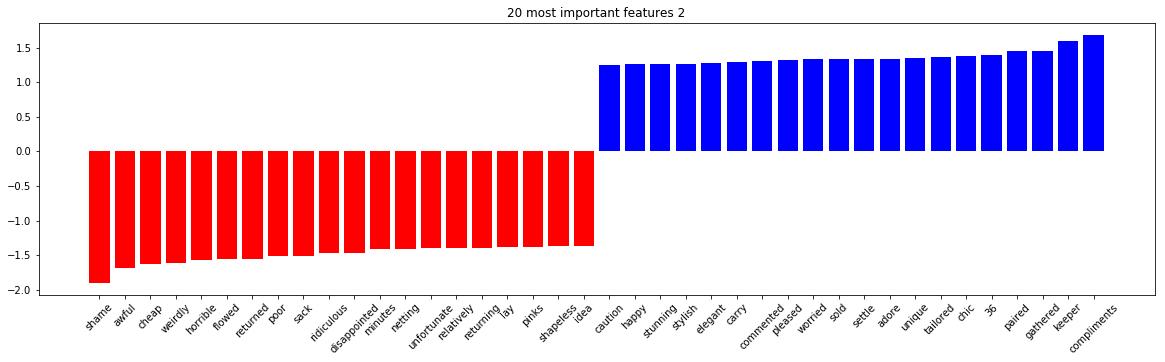

In [48]:
plot(logreg2.coef_[0],feature_names2,2)

In [49]:
#with CV
vect = CountVectorizer()
X_train2_cv = vect.fit_transform(train2_clean['Review'])
y_train2_cv = train2_clean['Recommended']
X_test2_cv = vect.transform(test2_clean['Review'])
y_test2_cv = test2_clean['Recommended']
feature_names2_cv = vect.get_feature_names()
logreg2_cv = LogisticRegressionCV(scoring = 'average_precision')
logreg2_cv.fit(X_train2_cv,y_train2_cv)
print('test score:',logreg2_cv.score(X_test2_cv,y_test2_cv))
print('C:',logreg2_cv.C_)

test score: 0.8853113983548766
C: [0.04641589]


In [50]:
print("Test Avg Precision score: ", average_precision_score(logreg2_cv.predict(X_test2_cv),y_test2_cv))
print("Test F1 score: ", f1_score(logreg2_cv.predict(X_test2_cv),y_test2_cv))
print("Test ROC AUC score: ", roc_auc_score(logreg2_cv.predict(X_test2_cv),y_test2_cv))

Test Avg Precision score:  0.9528662552399104
Test F1 score:  0.932259855635758
Test ROC AUC score:  0.8283578134163933


[0.39476932 0.4051235  0.40811273 0.41210727 0.41490591 0.4189841
 0.43531372 0.44060465 0.44149908 0.45566434 0.50470723 0.51847907
 0.55064313 0.5516149  0.55310592 0.59514034 0.61214012 0.62010928
 0.6774862  0.81566707]
['feminine', 'saw', 'casual', 'beautifully', 'sold', 'glad', 'comfy', 'details', 'happy', 'easy', 'soft', 'great', 'fits', 'little', 'perfectly', 'love', 'unique', 'compliments', 'comfortable', 'perfect']
[-0.88625722 -0.8190071  -0.79090345 -0.78025146 -0.77272856 -0.73718091
 -0.63278572 -0.5520016  -0.53327047 -0.52047645 -0.51559809 -0.49612217
 -0.46672958 -0.46422715 -0.4642191  -0.45324334 -0.44347934 -0.44039235
 -0.43873238 -0.43393663]
['disappointed', 'returned', 'cheap', 'wanted', 'returning', 'unflattering', 'huge', 'looked', 'unfortunately', 'poor', 'return', 'sack', 'idea', 'bad', 'excited', 'thin', 'going', 'shame', 'awful', 'nothing']
[-0.88625722 -0.8190071  -0.79090345 -0.78025146 -0.77272856 -0.73718091
 -0.63278572 -0.5520016  -0.53327047 -0.520

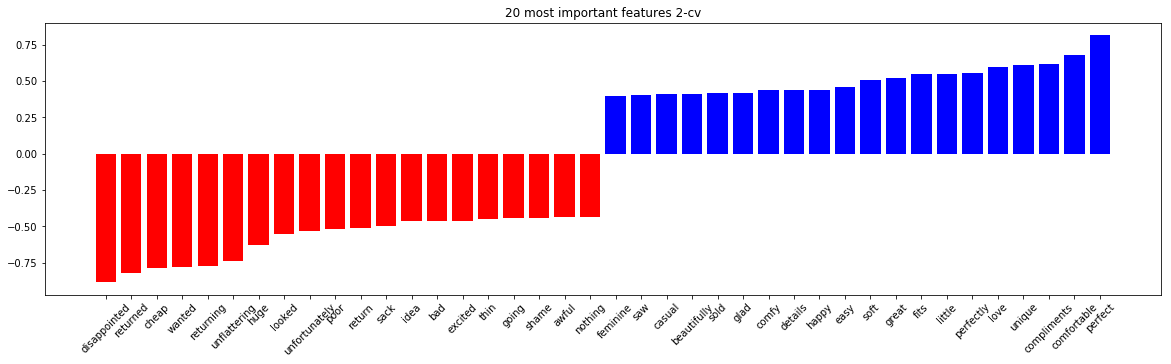

In [51]:
plot(logreg2_cv.coef_[0],feature_names2_cv,'2-cv')

#### 3) Concatenate the title and review to a single text and analyze that (discarding the information which words were in the title and which in the body)

In [52]:
train3 = pd.DataFrame()
train3['text'] = train['Title']+' '+train["Review"]
train3['Recommended'] = train['Recommended']
train3_clean = train3.dropna(thresh=2).reset_index(drop=True)
train3_clean.head()

,text,Recommended
0,Polished and comfort I'm 5' 120 lbs. i'm posti...,1
1,Great tee but kind of short I love this tee bu...,1
2,"Light weight, pockets, great for summer I run ...",1
3,Love it! This is a love at first sight item! b...,1
4,Great tank Grabbed this tank on sale today in ...,1


In [53]:
test3 = pd.DataFrame()
test3['text'] = test['Title']+' '+test["Review"]
test3['Recommended'] = test['Recommended']
test3_clean = test3.dropna(thresh=2).reset_index(drop=True)
test3_clean.head()

,text,Recommended
0,"Wanted to love I like the feel, stretch and so...",1
1,Romantic ruffled tee This ruffle tee is adorab...,1
2,"Extremely long! Lovely fabric, color and embel...",0
3,Dress for the younger girls I tried this dress...,1
4,Love this dress Cute print got lots of complim...,1


In [54]:
print(train3_clean.shape)
print(test3_clean.shape)

(11050, 2)
(3712, 2)


In [55]:
#default params
vect = CountVectorizer()
X_train3 = vect.fit_transform(train3_clean['text'])
y_train3 = train3_clean['Recommended']
X_test3 = vect.transform(test3_clean['text'])
y_test3 = test3_clean['Recommended']
feature_names3 = vect.get_feature_names()
logreg3 = LogisticRegression()
logreg3.fit(X_train3,y_train3)
print('test score:',logreg3.score(X_test3,y_test3))

test score: 0.9000538793103449


In [56]:
print("Test Avg Precision score: ", average_precision_score(logreg3.predict(X_test3),y_test3))
print("Test F1 score: ", f1_score(logreg3.predict(X_test3),y_test3))
print("Test ROC AUC score: ", roc_auc_score(logreg3.predict(X_test3),y_test3))

Test Avg Precision score:  0.9439139490835108
Test F1 score:  0.9397629485306056
Test ROC AUC score:  0.8408278802552166


[1.13156801 1.14108795 1.15055922 1.18674446 1.19659833 1.20166643
 1.20277726 1.20925404 1.2194466  1.21987525 1.22413549 1.23033497
 1.24318762 1.24498531 1.25118907 1.28928302 1.32363116 1.33488805
 1.34901106 1.49835442]
['nude', 'perfect', 'happy', 'compliments', 'everyday', 'pleased', 'complaint', 'tailored', 'snug', 'stylish', 'drop', 'petites', 'visible', 'elegant', 'dressed', 'keeper', 'subtle', 'caution', 'unique', 'awesome']
[-2.39605883 -1.91339793 -1.79320591 -1.72346667 -1.60940499 -1.52788685
 -1.49500465 -1.41725619 -1.404017   -1.40038187 -1.38043551 -1.36420585
 -1.3536216  -1.35043034 -1.34501161 -1.30418437 -1.26706672 -1.25600378
 -1.25454918 -1.23465425]
['meh', 'horrible', 'disappointed', 'shame', 'sack', 'poor', 'cheap', 'shapeless', 'returned', 'ridiculous', 'idea', 'disappointing', 'weirdly', 'wanted', 'age', 'pinks', 'awful', 'flawed', 'thru', 'happened']
[-2.39605883 -1.91339793 -1.79320591 -1.72346667 -1.60940499 -1.52788685
 -1.49500465 -1.41725619 -1.4040

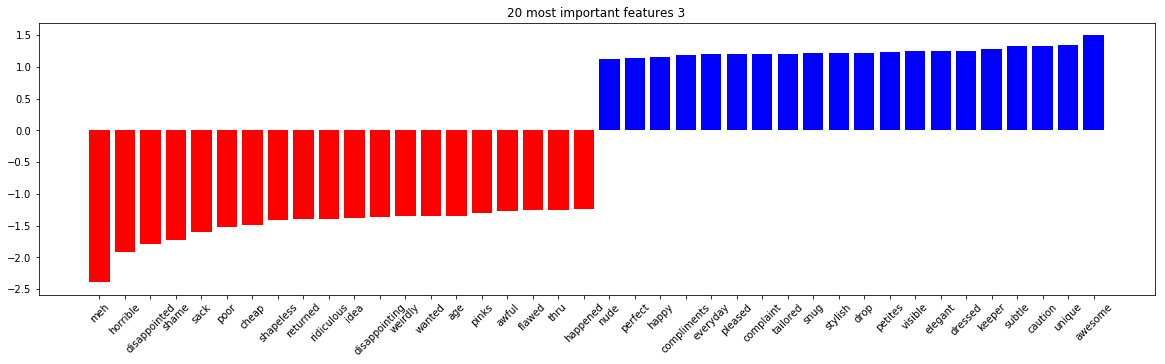

In [57]:
plot(logreg3.coef_[0],feature_names3,3)

In [58]:
#with CV
vect = CountVectorizer()
X_train3_cv = vect.fit_transform(train3_clean['text'])
y_train3_cv = train3_clean['Recommended']
X_test3_cv = vect.transform(test3_clean['text'])
y_test3_cv = test3_clean['Recommended']
feature_names3_cv = vect.get_feature_names() 
logreg3_cv = LogisticRegressionCV(scoring = 'average_precision')
logreg3_cv.fit(X_train3_cv,y_train3_cv)
print('test score:',logreg3_cv.score(X_test3_cv,y_test3_cv))
print('C:',logreg3_cv.C_)

test score: 0.9019396551724138
C: [0.04641589]


In [59]:
print("Test Avg Precision score: ", average_precision_score(logreg3_cv.predict(X_test3_cv),y_test3_cv))
print("Test F1 score: ", f1_score(logreg3_cv.predict(X_test3_cv),y_test3_cv))
print("Test ROC AUC score: ", roc_auc_score(logreg3_cv.predict(X_test3_cv),y_test3_cv))

Test Avg Precision score:  0.957901386683303
Test F1 score:  0.9416666666666665
Test ROC AUC score:  0.8594531249999999


[0.40208221 0.40372836 0.40706807 0.40809149 0.41205946 0.43642392
 0.43815441 0.44096992 0.45795047 0.46021334 0.46063932 0.47931092
 0.49111958 0.50290772 0.50340106 0.56286625 0.6270332  0.6366857
 0.68558436 0.76434295]
['lovely', 'nice', 'gorgeous', 'fits', 'details', 'saw', 'casual', 'easy', 'amazing', 'comfy', 'perfectly', 'fun', 'little', 'compliments', 'soft', 'great', 'love', 'comfortable', 'unique', 'perfect']
[-0.94793062 -0.82248579 -0.72301099 -0.71564163 -0.71419553 -0.65170696
 -0.64281057 -0.62366081 -0.56268363 -0.52605321 -0.50020319 -0.47809741
 -0.47456102 -0.47360343 -0.46740499 -0.46538254 -0.45039184 -0.43090914
 -0.42708775 -0.42111374]
['disappointed', 'wanted', 'cheap', 'unflattering', 'returned', 'poor', 'returning', 'huge', 'unfortunately', 'meh', 'idea', 'disappointing', 'return', 'sack', 'looked', 'bad', 'strange', 'going', 'least', 'sad']
[-0.94793062 -0.82248579 -0.72301099 -0.71564163 -0.71419553 -0.65170696
 -0.64281057 -0.62366081 -0.56268363 -0.5260

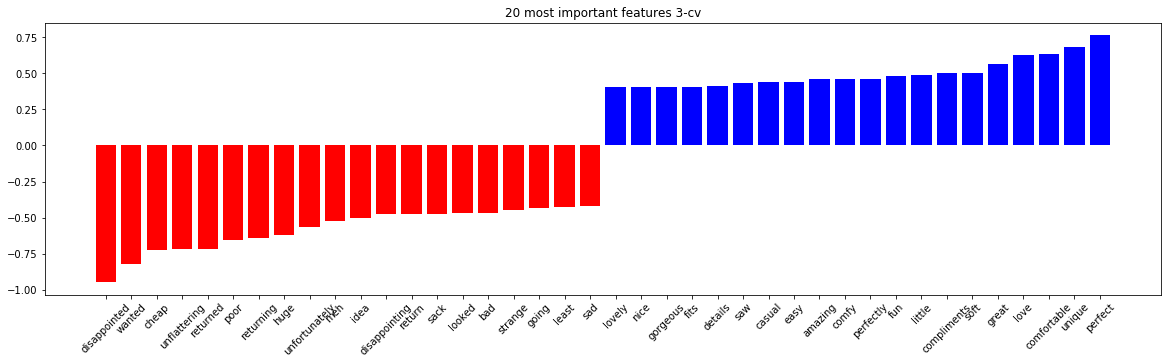

In [60]:
plot(logreg3_cv.coef_[0],feature_names3_cv,'3-cv')

#### 4) Vectorizing title and review individually and concatenating the vector representations.

In [61]:
train4_clean = train[['Title',"Review",'Recommended']].dropna(thresh=3).reset_index(drop=True)
test4_clean = test[['Title',"Review",'Recommended']].dropna(thresh=3).reset_index(drop=True)
print(train4_clean.shape,'\n',test4_clean.shape)


vect4_title = CountVectorizer()
vect4_rec = CountVectorizer()

X_train4_title = vect4_title.fit_transform(train4_clean["Title"])
X_train4_rev = vect4_rec.fit_transform(train4_clean["Review"])


y_train4 = train4_clean['Recommended']


(11050, 3) 
 (3712, 3)


In [62]:
X_test4_title = vect4_title.transform(test4_clean["Title"])
X_test4_rev = vect4_rec.transform(test4_clean["Review"])
y_test4 = test4_clean["Recommended"]

In [63]:
X_train4_rev

<11050x10647 sparse matrix of type '<class 'numpy.int64'>'
	with 484957 stored elements in Compressed Sparse Row format>

In [64]:
from scipy.sparse import hstack
X_train4 = hstack([X_train4_title,X_train4_rev])
X_test4 = hstack([X_test4_title,X_test4_rev])

In [65]:
X_train4

<11050x13428 sparse matrix of type '<class 'numpy.int64'>'
	with 520706 stored elements in COOrdinate format>

In [66]:
X_test4

<3712x13428 sparse matrix of type '<class 'numpy.int64'>'
	with 171579 stored elements in COOrdinate format>

In [67]:
feature_names4_rec = vect4_rec.get_feature_names()
feature_names4_title = vect4_title.get_feature_names()
logreg4 = LogisticRegression()
logreg4.fit(X_train4,y_train4)
logreg4.score(X_test4,y_test4)

0.9027478448275862

In [68]:
print("Test Avg Precision score: ", average_precision_score(logreg4.predict(X_test4),y_test4))
print("Test F1 score: ", f1_score(logreg4.predict(X_test4),y_test4))
print("Test ROC AUC score: ", roc_auc_score(logreg4.predict(X_test4),y_test4))

Test Avg Precision score:  0.9453093285416838
Test F1 score:  0.9413675491310703
Test ROC AUC score:  0.8455423362800365


In [69]:
logreg4_cv = LogisticRegressionCV(cv =5, scoring = 'average_precision')
logreg4_cv.fit(X_train4,y_train4)
print('test score:',logreg4_cv.score(X_test4,y_test4))
print('C:',logreg4_cv.C_)

test score: 0.9046336206896551
C: [0.35938137]


In [70]:
print("Test Avg Precision score: ", average_precision_score(logreg4_cv.predict(X_test4),y_test4))
print("Test F1 score: ", f1_score(logreg4_cv.predict(X_test4),y_test4))
print("Test ROC AUC score: ", roc_auc_score(logreg4_cv.predict(X_test4),y_test4))

Test Avg Precision score:  0.9494771109867495
Test F1 score:  0.942681347150259
Test ROC AUC score:  0.8521471088435373


In [71]:
feature_names4 = feature_names4_title + feature_names4_rec

[0.81463134 0.87359276 0.88011768 0.90551587 0.91829432 0.92213081
 0.92492873 0.94537372 0.9566697  0.97800786 0.98973036 1.0146892
 1.03090431 1.04130609 1.10670959 1.12638433 1.16461306 1.17325922
 1.30612345 1.37754093]
['perfect', 'amazing', 'little', 'beautiful', 'snug', 'lovely', 'compliments', 'soft', 'dressed', 'size', 'nice', 'pretty', 'cute', 'perfect', 'fun', 'great', 'gorgeous', 'comfortable', 'unique', 'love']
[-1.56189549 -1.52867536 -1.51233461 -1.35888602 -1.3345923  -1.25944505
 -1.22392258 -1.2225021  -1.20328803 -1.19458031 -1.18000706 -1.10246527
 -1.04466343 -1.02903462 -1.00303037 -0.99628394 -0.96904075 -0.95216346
 -0.92782255 -0.91146171]
['wanted', 'disappointed', 'meh', 'not', 'unflattering', 'disappointed', 'disappointing', 'poor', 'cheap', 'boxy', 'returned', 'strange', 'weird', 'sheer', 'huge', 'too', 'idea', 'returning', 'bad', 'lay']
[-1.56189549 -1.52867536 -1.51233461 -1.35888602 -1.3345923  -1.25944505
 -1.22392258 -1.2225021  -1.20328803 -1.19458031

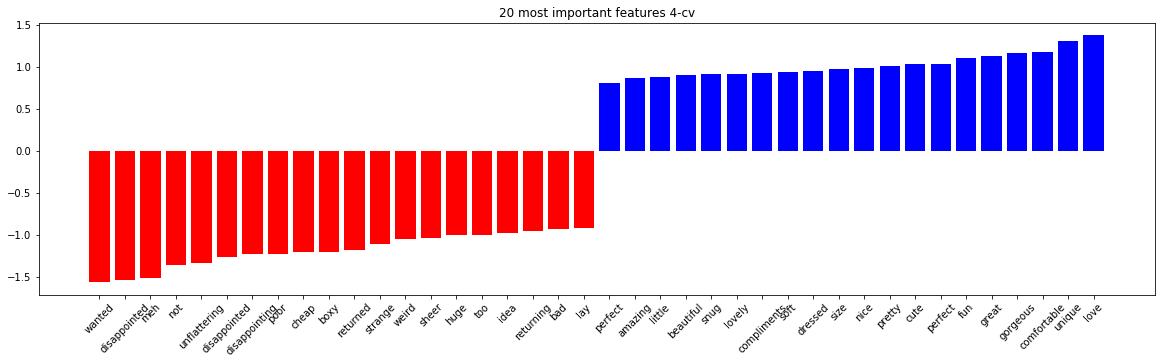

In [72]:
plot(logreg4_cv.coef_[0],feature_names4,'4-cv')

In [73]:
np.mean(y_train4)

0.8188235294117647

####  We notice that the 3rd case where title and text and combined gives the best performance in
terms of average precision score (95%) and roc auc(0.85). We will now evaluate this model on
the main test set

In [80]:
test_main_clean["text"] = test_main_clean['Title']+' '+test_main_clean["Review"]

In [81]:
X_test_4 = vect.transform(test_main_clean["text"])

In [92]:
print("Test Avg Precision score: ", average_precision_score(logreg3_cv.predict(X_test_4),test_main_clean["Recommended"]))
print("Test F1 score: ", f1_score(logreg3_cv.predict(X_test_4),test_main_clean["Recommended"]))

print("Test ROC AUC score: ", roc_auc_score(logreg3_cv.predict(X_test_4),test_main_clean["Recommended"]))

Test Avg Precision score:  0.9486764539339612
Test F1 score:  0.9367150347518595
Test ROC AUC score:  0.8403687175963356


#### Task 1 best model performance:

## Task 2 Feature Tuning (30Pts)
2.1 Try using TfidfVectorizer instead of CountVectorizer. Does it change the score? Does it
change the important coefficients?

In [93]:

#default params
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(train3_clean['text'])
y_train_tfidf = train3_clean['Recommended']
X_test_tfidf = tfidf.transform(test3_clean['text'])
y_test_tfidf = test3_clean['Recommended']
feature_names_tfidf = tfidf.get_feature_names() 
logreg_tfidf = LogisticRegression()
logreg_tfidf.fit(X_train_tfidf,y_train_tfidf)
print('test score:',logreg_tfidf.score(X_test_tfidf,y_test_tfidf))

test score: 0.8941271551724138


In [94]:
print("Test Avg Precision score: ", average_precision_score(logreg_tfidf.predict(X_test_tfidf),y_test_tfidf))
print("Test F1 score: ", f1_score(logreg_tfidf.predict(X_test_tfidf),y_test_tfidf))
print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf.predict(X_test_tfidf),y_test_tfidf))

Test Avg Precision score:  0.9629356198634692
Test F1 score:  0.9376289477860656
Test ROC AUC score:  0.8575848688151514


[2.09248257 2.13938754 2.19745164 2.22686581 2.27341588 2.3019988
 2.32906434 2.35540211 2.41595706 2.49280746 2.52753004 2.65070503
 3.00954211 3.26904901 3.32553049 3.68712319 3.69782749 4.45123347
 4.70409844 5.32630517]
['casual', 'gorgeous', 'beautiful', 'compliments', 'comfy', 'can', 'perfectly', 'size', 'fun', 'bit', 'nice', 'fits', 'unique', 'soft', 'with', 'little', 'comfortable', 'great', 'perfect', 'love']
[-4.99569282 -4.44874889 -3.86942362 -3.71174343 -3.68081519 -3.65433934
 -3.33179209 -3.26629893 -3.23100869 -3.18291678 -3.02562158 -2.91078915
 -2.69127786 -2.60782588 -2.48659668 -2.37095399 -2.3600974  -2.33941254
 -2.30621447 -2.29181333]
['disappointed', 'wanted', 'cheap', 'unflattering', 'not', 'was', 'huge', 'poor', 'returned', 'returning', 'unfortunately', 'looked', 'return', 'back', 'way', 'bad', 'disappointing', 'going', 'meh', 'strange']
[-4.99569282 -4.44874889 -3.86942362 -3.71174343 -3.68081519 -3.65433934
 -3.33179209 -3.26629893 -3.23100869 -3.18291678 -3

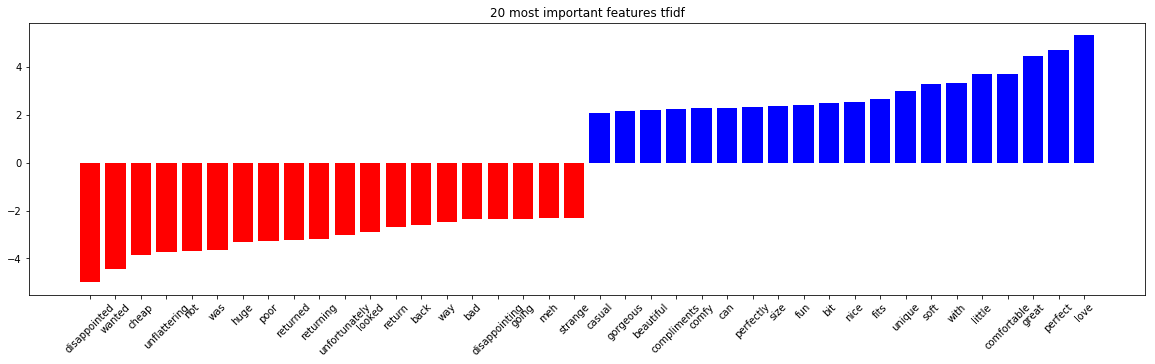

In [95]:
plot(logreg_tfidf.coef_[0],feature_names_tfidf,'tfidf')

In [96]:

#with CV
tfidf = TfidfVectorizer()
X_train_tfidf_cv = tfidf.fit_transform(train3_clean['text'])
y_train_tfidf_cv = train3_clean['Recommended']
X_test_tfidf_cv = tfidf.transform(test3_clean['text'])
y_test_tfidf_cv = test3_clean['Recommended']
feature_names_tfidf_cv = tfidf.get_feature_names()
logreg_tfidf_cv = LogisticRegressionCV(scoring = 'average_precision')
logreg_tfidf_cv.fit(X_train_tfidf_cv,y_train_tfidf_cv)
print('test score:',logreg_tfidf_cv.score(X_test_tfidf_cv,y_test_tfidf_cv))
print('C:',logreg_tfidf_cv.C_)

test score: 0.9038254310344828
C: [2.7825594]


In [97]:
print("Test Avg Precision score: ", average_precision_score(logreg_tfidf_cv.predict(X_test_tfidf_cv),y_test_tfidf_cv))
print("Test F1 score: ", f1_score(logreg_tfidf_cv.predict(X_test_tfidf_cv),y_test_tfidf_cv))
print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf_cv.predict(X_test_tfidf_cv),y_test_tfidf_cv))

Test Avg Precision score:  0.9585966509480018
Test F1 score:  0.9427609427609427
Test ROC AUC score:  0.8627186895481503


[2.94439503 2.95420097 2.98862285 3.04474636 3.05898066 3.1089594
 3.13522208 3.34257675 3.35637269 3.37070418 3.41464297 3.55682197
 3.89107609 4.48733884 4.58402845 4.80043976 4.81717174 5.70075478
 6.42287686 7.09552743]
['casual', 'saw', 'gorgeous', 'lovely', 'comfy', 'amazing', 'can', 'compliments', 'fits', 'nice', 'perfectly', 'fun', 'with', 'soft', 'unique', 'comfortable', 'little', 'great', 'perfect', 'love']
[-6.89177748 -5.94324219 -5.29909135 -4.92826849 -4.62379368 -4.44778146
 -4.43514515 -4.2361165  -4.22710151 -4.22567785 -3.85704102 -3.7499026
 -3.63912666 -3.57192731 -3.45421326 -3.44320321 -3.39383552 -3.37546573
 -3.35931019 -3.30712969]
['disappointed', 'wanted', 'cheap', 'unflattering', 'poor', 'returned', 'not', 'returning', 'huge', 'meh', 'unfortunately', 'was', 'disappointing', 'idea', 'looked', 'return', 'sack', 'shame', 'bad', 'shapeless']
[-6.89177748 -5.94324219 -5.29909135 -4.92826849 -4.62379368 -4.44778146
 -4.43514515 -4.2361165  -4.22710151 -4.22567785 

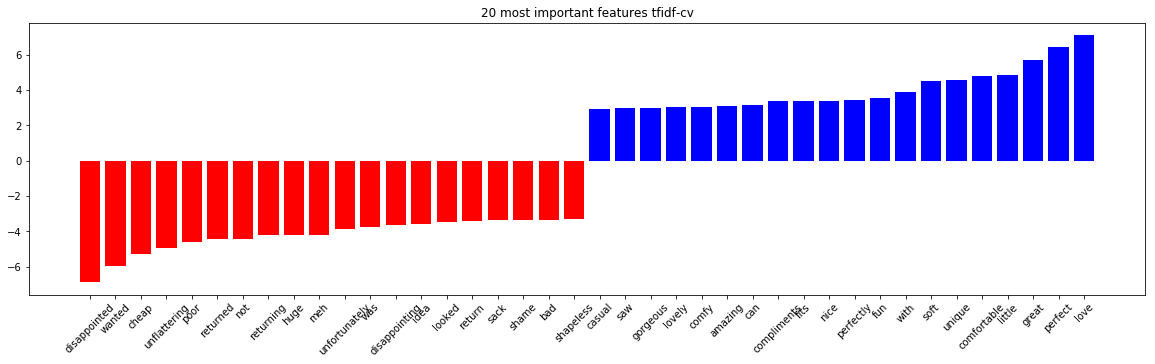

In [98]:
plot(logreg_tfidf_cv.coef_[0],feature_names_tfidf_cv,'tfidf-cv')

In [99]:
print ('With CountVectorizer:')
print('Test Score with Linear Classifier: ',logreg3.score(X_test3,y_test3))
print('Test Score with Linear Classifier and CV: ',logreg3_cv.score(X_test3_cv,y_test3_cv))
print('With TfidfVectorizer:')
print('Test Score with Linear Classifier: ',logreg_tfidf.score(X_test_tfidf,y_test_tfidf))
print('Test Score with Linear Classifier and CV: ',logreg_tfidf_cv.score(X_test_tfidf_cv,y_test_tfidf_cv))

With CountVectorizer:
Test Score with Linear Classifier:  0.9000538793103449
Test Score with Linear Classifier and CV:  0.9019396551724138
With TfidfVectorizer:
Test Score with Linear Classifier:  0.8941271551724138
Test Score with Linear Classifier and CV:  0.9038254310344828


#### Tfidf Vectorizer leads to a sizeable improvement in avg precision, roc auc and f1 scores. Also, it has imrpoved test set scores slightly

In [81]:
coef3 = coefs(logreg3.coef_[0],feature_names3)
coef3_cv = coefs(logreg3_cv.coef_[0],feature_names3_cv)
coef_tfidf = coefs(logreg_tfidf.coef_[0],feature_names_tfidf)
coef_tfidf_cv = coefs(logreg_tfidf_cv.coef_[0],feature_names_tfidf_cv)
coef_changed = list(set(coef_tfidf)-set(coef3))
coef_changed_cv = list(set(coef_tfidf_cv)-set(coef3_cv))

NameError: name 'coefs' is not defined

In [82]:
print('By using TfidfVectorizer instead of CountVectorizer')
print("{} Important Coefficients are changed using Linear Classifier. They are :\n{}".
      format(len(coef_changed), coef_changed))
print("{} Important Coefficients are changed using Linear Classifier CV. They are :\n{}".
      format(len(coef_changed_cv), coef_changed_cv))

By using TfidfVectorizer instead of CountVectorizer


NameError: name 'coef_changed' is not defined

2.2 Remember that TfidfVectorizer uses normalization by default. Does using a Normalizer with
CountVectorizer change the outcome?

In [100]:
#default params
pipe = Pipeline([("vect", CountVectorizer()),("norm", Normalizer())])
X_train_vect_norm = pipe.fit_transform(train3_clean['text'])
y_train_vect_norm = train3_clean['Recommended']
X_test_vect_norm = pipe.transform(test3_clean['text'])
y_test_vect_norm = test3_clean['Recommended']
feature_names_vect_norm = vect.get_feature_names()
logreg_vect_norm = LogisticRegression()
logreg_vect_norm.fit(X_train_vect_norm,y_train_vect_norm)
print('test score:',logreg_vect_norm.score(X_test_vect_norm,y_test_vect_norm))

test score: 0.8865840517241379


In [101]:
print("Test Avg Precision score: ", average_precision_score(logreg_vect_norm.predict(X_test_vect_norm),y_test_vect_norm))
print("Test F1 score: ", f1_score(logreg_vect_norm.predict(X_test_vect_norm),y_test_vect_norm))
print("Test ROC AUC score: ", roc_auc_score(logreg_vect_norm.predict(X_test_vect_norm),y_test_vect_norm))

Test Avg Precision score:  0.9623262110608359
Test F1 score:  0.9334387351778656
Test ROC AUC score:  0.8462705720060313


[2.24005194 2.25386505 2.25862045 2.28748061 2.31023473 2.35240952
 2.35915149 2.42706597 2.43365175 2.87378434 2.87729973 2.88015749
 3.01631627 3.1669745  3.48694268 3.91053321 4.08638695 4.24856756
 4.91520929 5.23968353]
['compliments', 'size', 'lovely', 'comfy', 'beautiful', 'can', 'gorgeous', 'perfectly', 'fun', 'bit', 'fits', 'nice', 'with', 'unique', 'soft', 'little', 'comfortable', 'great', 'love', 'perfect']
[-5.12670399 -5.0081439  -3.73306506 -3.66358728 -3.4832251  -3.41455485
 -3.23735383 -3.05121135 -3.04717558 -2.98922885 -2.98202468 -2.97198765
 -2.88187417 -2.82680257 -2.79909392 -2.37836579 -2.36703652 -2.21417501
 -2.13426747 -2.13203392]
['disappointed', 'wanted', 'cheap', 'unflattering', 'huge', 'looked', 'returned', 'unfortunately', 'return', 'poor', 'returning', 'was', 'not', 'back', 'way', 'going', 'thin', 'quality', 'bad', 'fabric']
[-5.12670399 -5.0081439  -3.73306506 -3.66358728 -3.4832251  -3.41455485
 -3.23735383 -3.05121135 -3.04717558 -2.98922885 -2.9820

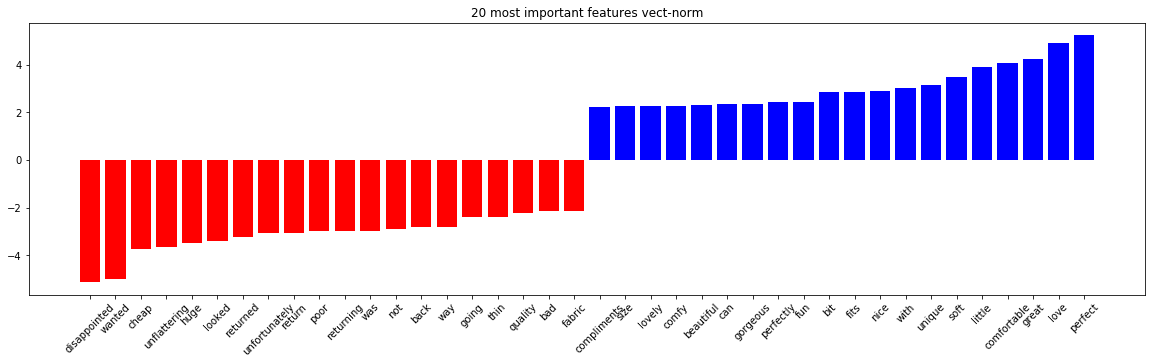

In [102]:
plot(logreg_vect_norm.coef_[0],feature_names_vect_norm,'vect-norm')

In [103]:
#with CV
pipe = Pipeline([("vect", CountVectorizer()),("norm", Normalizer())])
X_train_vect_norm_cv = pipe.fit_transform(train3_clean['text'])
y_train_vect_norm_cv = train3_clean['Recommended']
X_test_vect_norm_cv = pipe.transform(test3_clean['text'])
y_test_vect_norm_cv = test3_clean['Recommended']
feature_names_vect_norm_cv = vect.get_feature_names()
logreg_vect_norm_cv = LogisticRegressionCV(scoring = 'average_precision')
logreg_vect_norm_cv.fit(X_train_vect_norm_cv,y_train_vect_norm_cv)
print('test score:',logreg_vect_norm_cv.score(X_test_vect_norm_cv,y_test_vect_norm_cv))
print('C:',logreg_vect_norm_cv.C_)

test score: 0.9038254310344828
C: [21.5443469]


In [104]:
print("Test Avg Precision score: ", average_precision_score(logreg_vect_norm_cv.predict(X_test_vect_norm_cv),y_test_vect_norm_cv))
print("Test F1 score: ", f1_score(logreg_vect_norm_cv.predict(X_test_vect_norm_cv),y_test_vect_norm_cv))
print("Test ROC AUC score: ", roc_auc_score(logreg_vect_norm_cv.predict(X_test_vect_norm_cv),y_test_vect_norm_cv))

Test Avg Precision score:  0.9500635270064032
Test F1 score:  0.9422610383309074
Test ROC AUC score:  0.8518114570443314


[ 6.31262137  6.3730038   6.54245175  6.57643706  6.59211035  6.61633616
  6.6208594   6.75958487  6.91283185  6.96380744  7.0899158   7.13714624
  7.16500827  7.17384267  7.31491712  7.3225965   7.57555295  8.09884446
  9.35407459 10.13170993]
['soft', 'stylish', 'dressed', 'simple', 'stunning', 'elegant', 'comfortable', 'sold', 'easy', 'petites', 'fun', 'details', 'happy', 'love', 'awesome', 'snug', 'amazing', 'compliments', 'perfect', 'unique']
[-13.46475926 -11.92372875 -10.48106371 -10.28965939 -10.20624431
  -9.66949825  -9.5604566   -9.28634298  -8.77862343  -8.75790617
  -8.57879403  -8.53453032  -8.45603307  -7.93593593  -7.61419529
  -7.37509512  -7.25863754  -7.14673636  -7.07149836  -7.03989381]
['disappointed', 'meh', 'cheap', 'wanted', 'poor', 'unflattering', 'sack', 'idea', 'returned', 'shame', 'shapeless', 'horrible', 'disappointing', 'returning', 'lay', 'nothing', 'awful', 'huge', 'tent', 'bad']
[-13.46475926 -11.92372875 -10.48106371 -10.28965939 -10.20624431
  -9.669

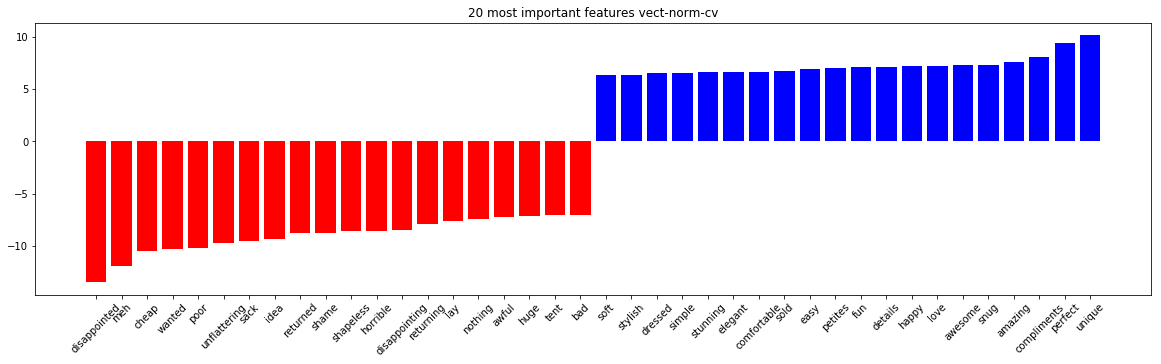

In [105]:
plot(logreg_vect_norm_cv.coef_[0],feature_names_vect_norm_cv,'vect-norm-cv')

In [106]:
print ('With CountVectorizer:')
print('Test Score with Linear Classifier: ',logreg3.score(X_test3,y_test3))
print('Test Score with Linear Classifier and CV: ',logreg3_cv.score(X_test3_cv,y_test3_cv))
print('With TfidfVectorizer:')
print('Test Score with Linear Classifier: ',logreg_tfidf.score(X_test_tfidf,y_test_tfidf))
print('Test Score with Linear Classifier and CV: ',logreg_tfidf_cv.score(X_test_tfidf_cv,y_test_tfidf_cv))
print('With CountVectorizer and Normalizer:')
print('Test Score with Linear Classifier: ',logreg_vect_norm.score(X_test_vect_norm,y_test_vect_norm))
print('Test Score with Linear Classifier and CV: ',logreg_vect_norm_cv.score(X_test_vect_norm_cv,y_test_vect_norm_cv))

With CountVectorizer:
Test Score with Linear Classifier:  0.9000538793103449
Test Score with Linear Classifier and CV:  0.9019396551724138
With TfidfVectorizer:
Test Score with Linear Classifier:  0.8941271551724138
Test Score with Linear Classifier and CV:  0.9038254310344828
With CountVectorizer and Normalizer:
Test Score with Linear Classifier:  0.8865840517241379
Test Score with Linear Classifier and CV:  0.9038254310344828


Using normalizer with countvectorizer has changed the outcome slightly only

#### 2.3 Try using stop-word. Do the standard English stop-words help? Why / why not?

In [107]:
#default params
vect = CountVectorizer(stop_words='english')
X_train_vect_sw = vect.fit_transform(train3_clean['text'])
y_train_vect_sw = train3_clean['Recommended']
X_test_vect_sw = vect.transform(test3_clean['text'])
y_test_vect_sw = test3_clean['Recommended']
feature_names_vect_sw = vect.get_feature_names()
logreg_vect_sw = LogisticRegression()
logreg_vect_sw.fit(X_train_vect_sw,y_train_vect_sw)
print('test score:',logreg_vect_sw.score(X_test_vect_sw,y_test_vect_sw))

test score: 0.8938577586206896


In [108]:
print("Test Avg Precision score: ", average_precision_score(logreg_vect_sw.predict(X_test_vect_sw),y_test_vect_sw))
print("Test F1 score: ", f1_score(logreg_vect_sw.predict(X_test_vect_sw),y_test_vect_sw))
print("Test ROC AUC score: ", roc_auc_score(logreg_vect_sw.predict(X_test_vect_sw),y_test_vect_sw))

Test Avg Precision score:  0.9426931502382033
Test F1 score:  0.9362046632124352
Test ROC AUC score:  0.8315972222222221


[1.17456085 1.18399199 1.19311733 1.20030561 1.21750688 1.2208869
 1.22367535 1.23957715 1.26108108 1.27002662 1.27658624 1.30557572
 1.33066094 1.37754599 1.39787232 1.40703433 1.42695141 1.44723632
 1.60389283 1.66545473]
['visible', 'tailored', 'boots', 'gathered', 'amazing', 'elegant', 'perfect', 'sold', 'petites', 'complaint', 'carry', 'keeper', 'awesome', 'caution', 'subtle', 'pleased', 'stylish', 'unique', 'compliments', 'dressed']
[-2.46259762 -1.88655574 -1.74883692 -1.65102191 -1.64693192 -1.63760849
 -1.54662851 -1.53775363 -1.52117409 -1.50201202 -1.49698782 -1.49580967
 -1.45855626 -1.45546244 -1.44121034 -1.43149071 -1.41997715 -1.39203247
 -1.38565867 -1.35809576]
['meh', 'disappointed', 'shame', 'sack', 'ridiculous', 'horrible', 'age', 'poor', 'cheap', 'poorly', 'happened', 'awful', 'shapeless', 'idea', 'weirdly', 'returned', 'split', 'wanted', 'disappointing', 'pinks']
[-2.46259762 -1.88655574 -1.74883692 -1.65102191 -1.64693192 -1.63760849
 -1.54662851 -1.53775363 -1.

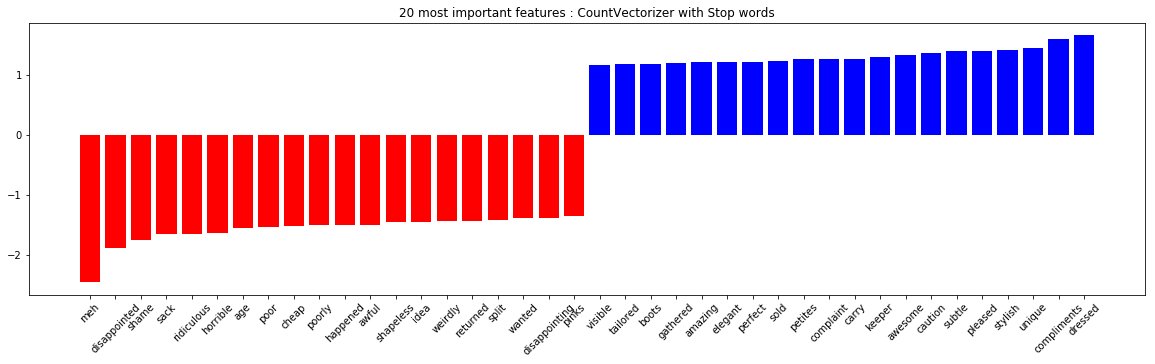

In [109]:
plot(logreg_vect_sw.coef_[0],feature_names_vect_sw,': CountVectorizer with Stop words')

In [110]:
#with CV and stopwords
vect = CountVectorizer(stop_words='english')
X_train_vect_sw_cv = vect.fit_transform(train3_clean['text'])
y_train_vect_sw_cv = train3_clean['Recommended']
X_test_vect_sw_cv = vect.transform(test3_clean['text'])
y_test_vect_sw_cv = test3_clean['Recommended']
feature_names_vect_sw_cv = vect.get_feature_names()
logreg_vect_sw_cv = LogisticRegressionCV(scoring = 'average_precision')
logreg_vect_sw_cv.fit(X_train_vect_sw_cv,y_train_vect_sw_cv)
print('test score:',logreg_vect_sw_cv.score(X_test_vect_sw_cv,y_test_vect_sw_cv))
print('C:',logreg_vect_sw_cv.C_)


test score: 0.8970905172413793
C: [0.35938137]


In [111]:
print("Test Avg Precision score: ", average_precision_score(logreg_vect_sw_cv.predict(X_test_vect_sw_cv),y_test_vect_sw_cv))
print("Test F1 score: ", f1_score(logreg_vect_sw_cv.predict(X_test_vect_sw_cv),y_test_vect_sw_cv))
print("Test ROC AUC score: ", roc_auc_score(logreg_vect_sw_cv.predict(X_test_vect_sw_cv),y_test_vect_sw_cv))

Test Avg Precision score:  0.9491541711885757
Test F1 score:  0.9384268214055448
Test ROC AUC score:  0.84231823341054


[0.80923534 0.82705414 0.8303592  0.83368338 0.83480009 0.8425328
 0.85559398 0.85983122 0.86245972 0.86787494 0.87350489 0.87475978
 0.8844068  0.90924645 0.95123496 0.97282985 1.07621379 1.17346777
 1.21227839 1.2631661 ]
['petites', 'comfortable', 'stunning', 'easy', 'elegant', 'happy', 'pleased', 'feminine', 'comfy', 'complaint', 'fun', 'sold', 'subtle', 'awesome', 'stylish', 'amazing', 'perfect', 'dressed', 'unique', 'compliments']
[-1.69871868 -1.59271072 -1.25834789 -1.22689456 -1.20329631 -1.20029813
 -1.19635575 -1.14682788 -1.12701236 -1.12431816 -1.11874634 -1.08525887
 -1.07995713 -1.06937336 -1.06817099 -1.03804975 -1.00257063 -0.97723391
 -0.94498521 -0.9297375 ]
['meh', 'disappointed', 'cheap', 'returned', 'wanted', 'poor', 'sack', 'shame', 'unflattering', 'idea', 'awful', 'shapeless', 'disappointing', 'ridiculous', 'returning', 'horrible', 'poorly', 'bad', 'unfortunately', 'scratchy']
[-1.69871868 -1.59271072 -1.25834789 -1.22689456 -1.20329631 -1.20029813
 -1.19635575 

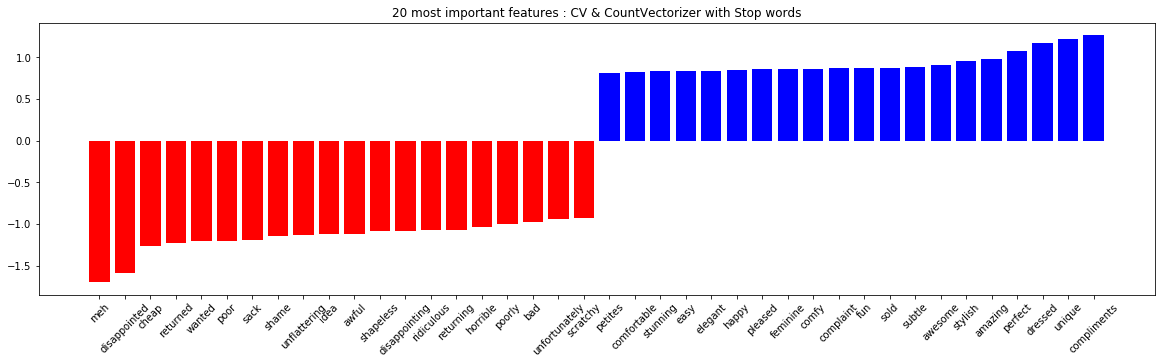

In [112]:
plot(logreg_vect_sw_cv.coef_[0],feature_names_vect_sw_cv,': CV & CountVectorizer with Stop words')

In [113]:
#default params and tfidf with stop words

tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf_sw = tfidf.fit_transform(train3_clean['text'])
y_train_tfidf_sw = train3_clean['Recommended']
X_test_tfidf_sw = tfidf.transform(test3_clean['text'])
y_test_tfidf_sw = test3_clean['Recommended']
feature_names_tfidf_sw = tfidf.get_feature_names()
logreg_tfidf_sw = LogisticRegression()
logreg_tfidf_sw.fit(X_train_tfidf_sw,y_train_tfidf_sw)
print('test score:',logreg_tfidf_sw.score(X_test_tfidf_sw,y_test_tfidf_sw))

test score: 0.8908943965517241


In [114]:
print("Test Avg Precision score: ", average_precision_score(logreg_tfidf_sw.predict(X_test_tfidf_sw),y_test_tfidf_sw))
print("Test F1 score: ", f1_score(logreg_tfidf_sw.predict(X_test_tfidf_sw),y_test_tfidf_sw))
print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf_sw.predict(X_test_tfidf_sw),y_test_tfidf_sw))

Test Avg Precision score:  0.9655634282026266
Test F1 score:  0.9360088481592669
Test ROC AUC score:  0.8580902600329057


[2.3009829  2.3061024  2.31572527 2.33685789 2.38240928 2.40991109
 2.41125853 2.51073089 2.51610514 2.56248866 2.57922736 2.65842946
 2.88638122 3.29683215 3.44858049 3.58810714 3.88243342 4.48586845
 4.98264925 5.40717289]
['jeans', 'gorgeous', 'size', 'amazing', 'lovely', 'beautiful', 'nice', 'bit', 'perfectly', 'comfy', 'fun', 'compliments', 'fits', 'unique', 'soft', 'little', 'comfortable', 'great', 'perfect', 'love']
[-5.30188303 -4.55235823 -3.79279845 -3.70260369 -3.58397836 -3.36123734
 -3.34217686 -3.32351398 -3.26243761 -2.76548609 -2.75977844 -2.75616601
 -2.72429106 -2.63725129 -2.58742013 -2.54545785 -2.43581739 -2.43423368
 -2.28373859 -2.20294399]
['disappointed', 'wanted', 'cheap', 'unflattering', 'returned', 'poor', 'unfortunately', 'huge', 'returning', 'bad', 'looked', 'way', 'return', 'disappointing', 'going', 'meh', 'idea', 'strange', 'fabric', 'weird']
[-5.30188303 -4.55235823 -3.79279845 -3.70260369 -3.58397836 -3.36123734
 -3.34217686 -3.32351398 -3.26243761 -2.

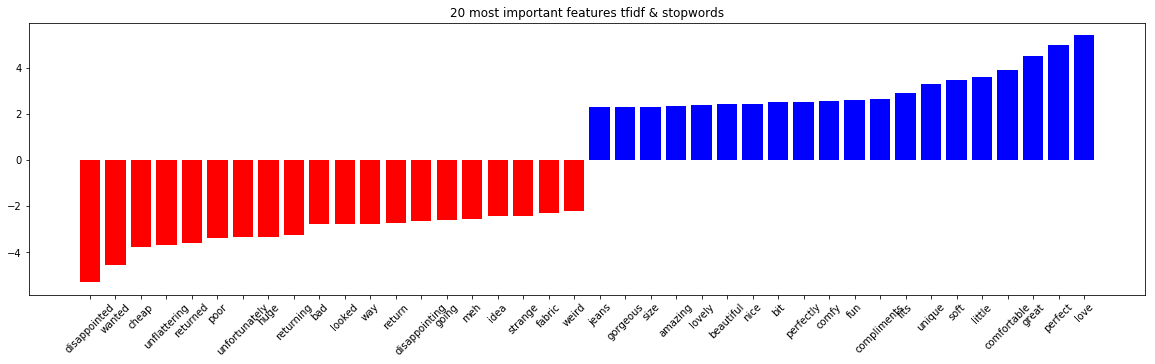

In [115]:
plot(logreg_tfidf_sw.coef_[0],feature_names_tfidf_sw,'tfidf & stopwords')

In [116]:

#with CV tfidf with stop words

tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf_sw_cv = tfidf.fit_transform(train3_clean['text'])
y_train_tfidf_sw_cv = train3_clean['Recommended']
X_test_tfidf_sw_cv = tfidf.transform(test3_clean['text'])
y_test_tfidf_sw_cv = test3_clean['Recommended']
feature_names_tfidf_sw_cv = tfidf.get_feature_names()
logreg_tfidf_sw_cv = LogisticRegressionCV(scoring = 'average_precision')
logreg_tfidf_sw_cv.fit(X_train_tfidf_sw_cv,y_train_tfidf_sw_cv)
print('test score:',logreg_tfidf_sw_cv.score(X_test_tfidf_sw_cv,y_test_tfidf_sw_cv))
print('C:',logreg_tfidf_sw_cv.C_)

test score: 0.896551724137931
C: [2.7825594]


In [117]:
print("Test Avg Precision score: ", average_precision_score(logreg_tfidf_sw_cv.predict(X_test_tfidf_sw_cv),y_test_tfidf_sw_cv))
print("Test F1 score: ", f1_score(logreg_tfidf_sw_cv.predict(X_test_tfidf_sw_cv),y_test_tfidf_sw_cv))
print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf_sw_cv.predict(X_test_tfidf_sw_cv),y_test_tfidf_sw_cv))

Test Avg Precision score:  0.9561699222173222
Test F1 score:  0.9385600000000001
Test ROC AUC score:  0.8502798773752341


[3.01292796 3.01629059 3.02038183 3.05531254 3.09541126 3.34611262
 3.35333217 3.39677907 3.50383101 3.50726187 3.56284535 3.64294959
 3.97243531 4.5366424  4.60802404 4.78285937 4.82184229 5.43067125
 6.5673147  6.96127529]
['beautiful', 'gorgeous', 'stylish', 'happy', 'nice', 'dressed', 'lovely', 'comfy', 'perfectly', 'amazing', 'fits', 'fun', 'compliments', 'soft', 'little', 'comfortable', 'unique', 'great', 'perfect', 'love']
[-6.96071395 -5.72522656 -5.03425242 -4.69036219 -4.5992815  -4.54864484
 -4.44735279 -4.12354267 -4.09390773 -4.02655986 -3.79533085 -3.78307843
 -3.68449888 -3.5353757  -3.4727326  -3.43721652 -3.41277891 -3.37707449
 -3.30198251 -3.23870445]
['disappointed', 'wanted', 'cheap', 'unflattering', 'returned', 'poor', 'meh', 'returning', 'unfortunately', 'huge', 'bad', 'disappointing', 'idea', 'shame', 'going', 'sack', 'shapeless', 'strange', 'way', 'return']
[-6.96071395 -5.72522656 -5.03425242 -4.69036219 -4.5992815  -4.54864484
 -4.44735279 -4.12354267 -4.0939

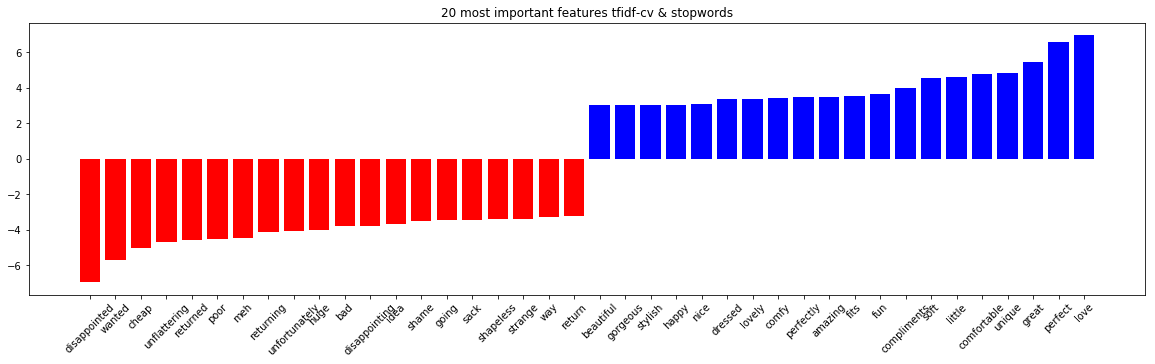

In [118]:
plot(logreg_tfidf_sw_cv.coef_[0],feature_names_tfidf_sw_cv,'tfidf-cv & stopwords')

In [119]:
print ('With CountVectorizer:')
print('Test Score with Linear Classifier: ',logreg3.score(X_test3,y_test3))
print('Test Score with Linear Classifier and CV: ',logreg3_cv.score(X_test3_cv,y_test3_cv))
print('With TfidfVectorizer:')
print('Test Score with Linear Classifier: ',logreg_tfidf.score(X_test_tfidf,y_test_tfidf))
print('Test Score with Linear Classifier and CV: ',logreg_tfidf_cv.score(X_test_tfidf_cv,y_test_tfidf_cv))

With CountVectorizer:
Test Score with Linear Classifier:  0.9000538793103449
Test Score with Linear Classifier and CV:  0.9019396551724138
With TfidfVectorizer:
Test Score with Linear Classifier:  0.8941271551724138
Test Score with Linear Classifier and CV:  0.9038254310344828


In [120]:
print ('With CountVectorizer and Stop Words:')
print('Test Score with Linear Classifier: ',logreg_vect_sw.score(X_test_vect_sw,y_test_vect_sw))
print('Test Score with Linear Classifier and CV: ',logreg_vect_sw_cv.score(X_test_vect_sw_cv,y_test_vect_sw_cv))
print('With TfidfVectorizer and Stop Words:')
print('Test Score with Linear Classifier: ',logreg_tfidf_sw.score(X_test_tfidf_sw,y_test_tfidf_sw))
print('Test Score with Linear Classifier and CV: ',logreg_tfidf_sw_cv.score(X_test_tfidf_sw_cv,y_test_tfidf_sw_cv))

With CountVectorizer and Stop Words:
Test Score with Linear Classifier:  0.8938577586206896
Test Score with Linear Classifier and CV:  0.8970905172413793
With TfidfVectorizer and Stop Words:
Test Score with Linear Classifier:  0.8908943965517241
Test Score with Linear Classifier and CV:  0.896551724137931


### Stop words removal also gives a sizeable improvement in avg precision and roc auc scores. But not much in terms of accuracy. Thus removal of stop words improves performance of this imbalanced model.

In [121]:
print('Lenght of feature_names before stop words removal:')
print('before')
bsw = [feature_names3, feature_names3_cv, feature_names_tfidf, feature_names_tfidf_cv]
for i in bsw:
    print(len(i))
asw = [feature_names_vect_sw, feature_names_vect_sw_cv, feature_names_tfidf_sw, feature_names_tfidf_sw_cv]
print('after')
for i in asw:
    print(len(i))

Lenght of feature_names before stop words removal:
before
11037
11037
11037
11037
after
10757
10757
10757
10757


The features were reduced by merely 280 which is less than 2.25%. So, no much impact on stop words removal

#### 2.4 Limit the vocabulary using min_df or max_df. How to these impact the number of features, and how do they impact the scores?

In [154]:
def min_df(feature_count,test_scores,title):
    plt.plot(range(1,11),feature_count)
    plt.title(str(title))
    plt.xlabel('min_df')
    plt.ylabel('Number of Features')
    plt.show()
    plt.plot(range(1,11),test_scores)
    plt.xlabel('min_df')
    plt.ylabel('Test-set score')
    plt.show()

In [135]:
feature_count_vect = []
test_scores_vect = []
for i in range(1,11):
#default params
    vect = CountVectorizer(min_df = i)
    X_train = vect.fit_transform(train3_clean['text'])
    y_train = train3_clean['Recommended']
    X_test = vect.transform(test3_clean['text'])
    y_test = test3_clean['Recommended']
    feature_names = vect.get_feature_names()
    feature_count_vect.append(len(feature_names))
    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    test_scores_vect.append(average_precision_score(logreg.predict(X_test), y_test))

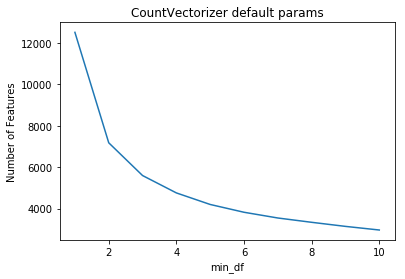

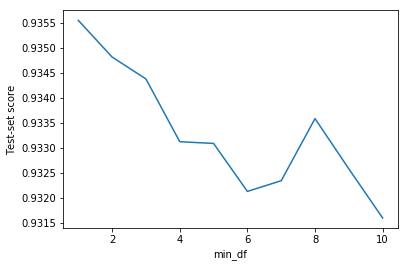

In [137]:
min_df(feature_count_vect,test_scores_vect,'CountVectorizer default params')

In [152]:
feature_count_vect_cv = []
test_scores_vect_cv = []
for i in range(1,11):
#default params and CV
    vect = CountVectorizer(min_df = i)
    X_train = vect.fit_transform(train3_clean['text'])
    y_train = train3_clean['Recommended']
    X_test = vect.transform(test3_clean['text'])
    y_test = test3_clean['Recommended']
    feature_names = vect.get_feature_names()
    feature_count_vect_cv.append(len(feature_names))
    logreg = LogisticRegressionCV(scoring = 'average_precision')
    logreg.fit(X_train,y_train)
    test_scores_vect_cv.append(average_precision_score(logreg.predict(X_test),y_test))

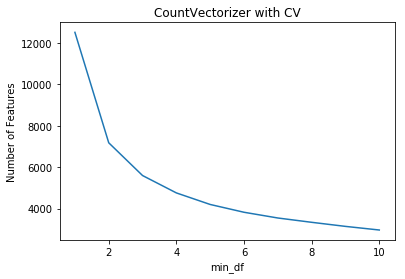

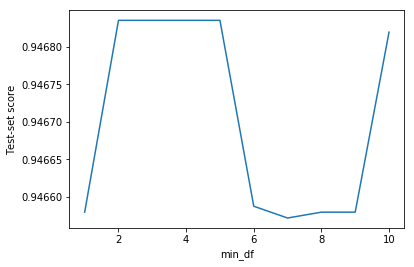

In [153]:
min_df(feature_count_vect_cv,test_scores_vect_cv, 'CountVectorizer with CV')

In [150]:
feature_count_tfidf = []
test_scores_tfidf = []
#default params and tfidf
for i in range(1,11):
    tfidf = TfidfVectorizer(min_df = i)
    X_train = tfidf.fit_transform(train3_clean['text'])
    y_train = train3_clean['Recommended']
    X_test = tfidf.transform(test3_clean['text'])
    y_test = test3_clean['Recommended']
    feature_names = tfidf.get_feature_names() 
    feature_count_tfidf.append(len(feature_names))
    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    test_scores_tfidf.append(average_precision_score(logreg.predict(X_test),y_test))

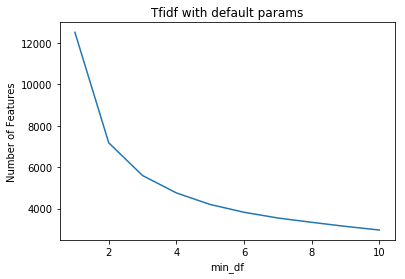

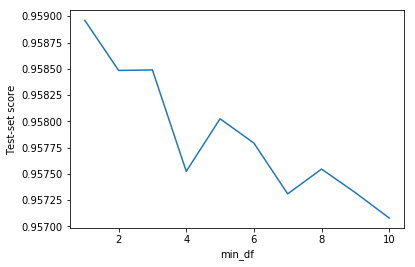

In [151]:
min_df(feature_count_tfidf,test_scores_tfidf,'Tfidf with default params')

In [154]:
feature_count_tfidf_cv = []
test_scores_tfidf_cv = []
#default params and tfidf
for i in range(1,11):
    tfidf = TfidfVectorizer(min_df = i)
    X_train = tfidf.fit_transform(train3_clean['text'])
    y_train = train3_clean['Recommended']
    X_test = tfidf.transform(test3_clean['text'])
    y_test = test3_clean['Recommended']
    feature_names = tfidf.get_feature_names() 
    feature_count_tfidf_cv.append(len(feature_names))
    logreg = LogisticRegressionCV(scoring = 'average_precision')
    logreg.fit(X_train,y_train)
    test_scores_tfidf_cv.append(average_precision_score(logreg.predict(X_test),y_test))

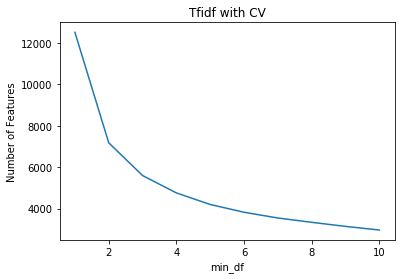

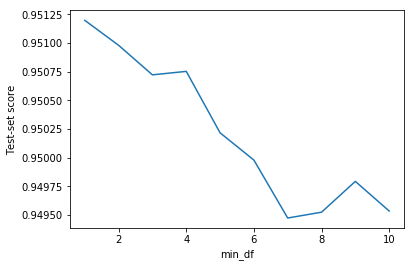

In [155]:
min_df(feature_count_tfidf_cv,test_scores_tfidf_cv,'Tfidf with CV')

##### max_df

In [150]:
def max_df(feature_count,test_scores,title):
    plt.plot(range(1,21),feature_count)
    plt.title(str(title))
    plt.xlabel('max_df')
    plt.ylabel('Number of Features')
    plt.show()
    plt.plot(range(1,21),test_scores)
    plt.xlabel('max_df')
    plt.ylabel('Test-set score')
    plt.show()

In [422]:
feature_count_vect = []
test_scores_vect = []
for i in range(1,21):
#default params
    vect = CountVectorizer(max_df = i)
    X_train = vect.fit_transform(train3_clean['text'])
    y_train = train3_clean['Recommended']
    X_test = vect.transform(test3_clean['text'])
    y_test = test3_clean['Recommended']
    feature_names = vect.get_feature_names()
    feature_count_vect.append(len(feature_names))
    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    test_scores_vect.append(average_precision_score(logreg.predict(X_test),y_test))

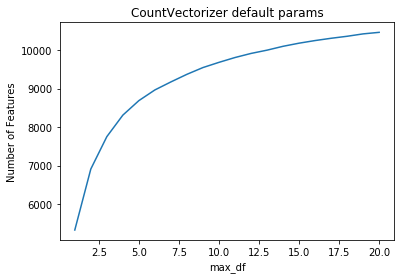

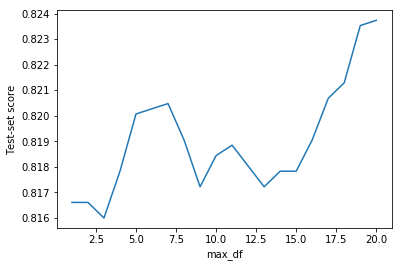

In [423]:
max_df(feature_count_vect,test_scores_vect,'CountVectorizer default params')

In [424]:
feature_count_vect_cv = []
test_scores_vect_cv = []
for i in range(1,21):
#default params and CV
    vect = CountVectorizer(max_df = i)
    X_train = vect.fit_transform(train3_clean['text'])
    y_train = train3_clean['Recommended']
    X_test = vect.transform(test3_clean['text'])
    y_test = test3_clean['Recommended']
    feature_names = vect.get_feature_names()
    feature_count_vect_cv.append(len(feature_names))
    logreg = LogisticRegressionCV(scoring = 'average_precision')
    logreg.fit(X_train,y_train)
    test_scores_vect_cv.append(average_precision_score(logreg.predict(X_test),y_test))

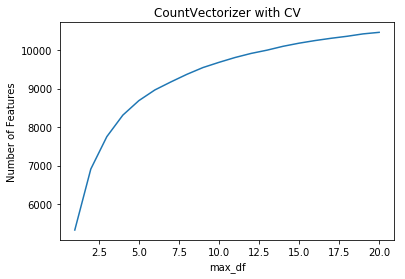

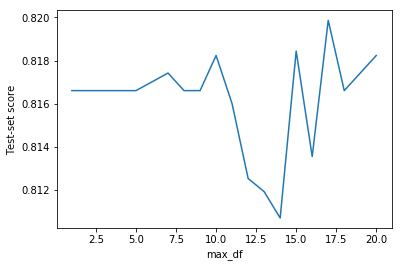

In [425]:
max_df(feature_count_vect_cv,test_scores_vect_cv, 'CountVectorizer with CV')

In [426]:
feature_count_tfidf = []
test_scores_tfidf = []
#default params and tfidf
for i in range(1,21):
    tfidf = TfidfVectorizer(max_df = i)
    X_train = tfidf.fit_transform(train3_clean['text'])
    y_train = train3_clean['Recommended']
    X_test = tfidf.transform(test3_clean['text'])
    y_test = test3_clean['Recommended']
    feature_names = tfidf.get_feature_names() 
    feature_count_tfidf.append(len(feature_names))
    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    test_scores_tfidf.append(average_precision_score(logreg.predict(X_test),y_test))

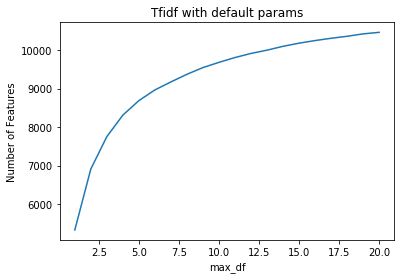

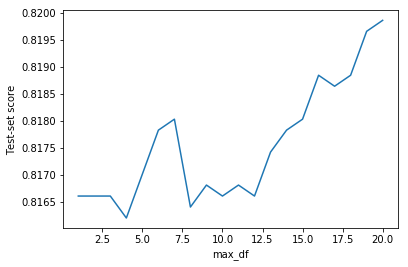

In [427]:
max_df(feature_count_tfidf,test_scores_tfidf,'Tfidf with default params')

In [428]:
feature_count_tfidf_cv = []
test_scores_tfidf_cv = []
#default params and tfidf
for i in range(1,21):
    tfidf = TfidfVectorizer(max_df = i)
    X_train = tfidf.fit_transform(train3_clean['text'])
    y_train = train3_clean['Recommended']
    X_test = tfidf.transform(test3_clean['text'])
    y_test = test3_clean['Recommended']
    feature_names = tfidf.get_feature_names() 
    feature_count_tfidf_cv.append(len(feature_names))
    logreg = LogisticRegressionCV(scoring = 'average_precision')
    logreg.fit(X_train,y_train)
    test_scores_tfidf_cv.append(average_precision_score(logreg.predict(X_test),y_test))

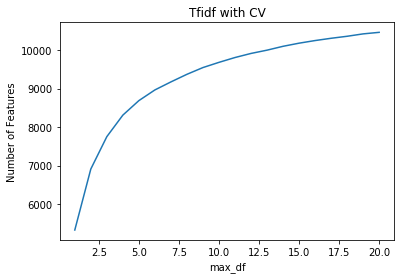

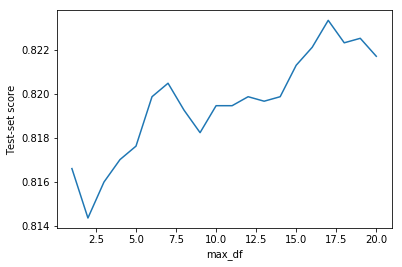

In [429]:
max_df(feature_count_tfidf_cv,test_scores_tfidf_cv,'Tfidf with CV')

It is seen clearly that with increase in min_df number of features are reducing and with increase in max_df number of features are increasing

Also, variation in both min_df and max_df has changed the test scores very slightly only. 

#### Now we evaluate the best model of Task 2 with the main test set The tfidf with stop words
has the best model performance on the basis of average precision score and roc auc

In [125]:
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf_sw_cv = tfidf.fit_transform(train3_clean['text'])
X_test_4 = tfidf.transform(test_main_clean["text"])
#logreg_tfidf_sw_cv
print("Test Avg Precision score: ", average_precision_score(logreg_tfidf_sw_cv.predict(X_test_4),test_main_clean["Recommended"]))
print("Test F1 score: ", f1_score(logreg_tfidf_sw_cv.predict(X_test_4),test_main_clean["Recommended"]))
print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf_sw_cv.predict(X_test_4),test_main_clean["Recommended"]))

Test Avg Precision score:  0.9523179388775456
Test F1 score:  0.9371734111070605
Test ROC AUC score:  0.845128094003745


## Task 3 n-grams (30Pts)
3.1 Using your current best model, try changing from unigrams to n-grams of varying length.
What provides the best performance? Visualize the coefficients. Try visualizing only the
higher-order n-grams that are important.

#### In terms of average precision scores the best model is tfidf vectorizer with stop words

In [126]:
tfidf22 = TfidfVectorizer(stop_words='english', ngram_range=(2,2))

X_train_tfidf22_sw = tfidf22.fit_transform(train3_clean['text'])
y_train_tfidf22_sw = train3_clean['Recommended']
X_test_tfidf22_sw = tfidf22.transform(test3_clean['text'])
y_test_tfidf22_sw = test3_clean['Recommended']
feature_names_tfidf22_sw = tfidf22.get_feature_names()
logreg_tfidf22_sw = LogisticRegressionCV(scoring = 'average_precision')
logreg_tfidf22_sw.fit(X_train_tfidf22_sw,y_train_tfidf22_sw)
print('test score:',logreg_tfidf22_sw.score(X_test_tfidf22_sw,y_test_tfidf22_sw))



test score: 0.8477909482758621


In [127]:
print("Test Avg Precision score: ", average_precision_score(logreg_tfidf22_sw.predict(X_test_tfidf22_sw),y_test_tfidf22_sw))
print("Test F1 score: ", f1_score(logreg_tfidf22_sw.predict(X_test_tfidf22_sw),y_test_tfidf22_sw))
print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf22_sw.predict(X_test_tfidf22_sw),y_test_tfidf22_sw))

Test Avg Precision score:  0.986600886765145
Test F1 score:  0.9143290371493555
Test ROC AUC score:  0.844432798516488


In [128]:
colour = []
for i in range(40):
    if i < 20:
        colour.append("red")
    else:
        colour.append("blue")
    
def plot2(coef,feature_names,titl): #plots top 20 features
    top300_index_pos = coef.argsort()[-300:]
    top300_names_pos = [feature_names[j] for j in top300_index_pos]
    top300_coef_pos = coef[top300_index_pos]
#     print (top300_coef_pos)
    names_pos = []
    coef_pos =[]
    total = 1
    for i in range(300):
        if total <=20:
            if " " in top300_names_pos[299-i]:
                names_pos.append(top300_names_pos[299-i])
                coef_pos.append(top300_coef_pos[299-i])
                total += 1


    top300_index_neg = coef.argsort()[:300]
    top300_names_neg = [feature_names[j] for j in top300_index_neg]
    top300_coef_neg = coef[top300_index_neg]
    names_neg = []
    coef_neg =[]
    total = 1
    for i in range(300):
        if total <=20:
            if " " in top300_names_neg[i]:
                names_neg.append(top300_names_neg[i])
                coef_neg.append(top300_coef_neg[i])
                total += 1

    top_coef = np.hstack([coef_neg,coef_pos[::-1]])
    print(top_coef)
    top_names = np.hstack([names_neg,names_pos[::-1]])
    print(top_names)

    plt.figure(figsize=(20, 5))
    plt.bar(range(1,41),top_coef,color=colour)
    plt.title('20 most important features '+str(titl))
    plt.xticks(range(1,41),top_names,rotation=45)
    plt.show()


[-9.0856232  -6.57447277 -6.38915129 -4.8864649  -4.33638676 -4.26281264
 -4.06131416 -4.01432979 -3.72766483 -3.6300072  -3.26297273 -2.9171034
 -2.85452958 -2.75169686 -2.64496263 -2.64306013 -2.41058543 -2.37844523
 -2.33830356 -2.28227743  2.25893989  2.28064033  2.43007098  2.43029037
  2.43118588  2.49801638  2.52789776  2.55490649  2.74083656  2.74205218
  2.75698752  2.75783424  2.81644333  2.89427416  3.10167077  3.42495657
  3.90525259  4.11881739  4.13792775  4.55018005]
['wanted love' 'looked like' 'poor quality' 'really wanted' 'didn work'
 'wanted like' 'high hopes' 'felt like' 'looks like' 'way big' 'look like'
 'just okay' 'did work' 'strange fit' 'sadly going' 'lay flat'
 'looks cheap' 'worth money' 'disappointed quality' 'feels cheap'
 'length perfect' 'perfect summer' 'super comfortable' 'perfect fit'
 'easy wear' 'fit perfectly' 'fits great' 'absolutely love' 'skinny jeans'
 'looks great' 'great fit' 'fit perfect' 'wait wear'
 'received compliments' 'highly recommen

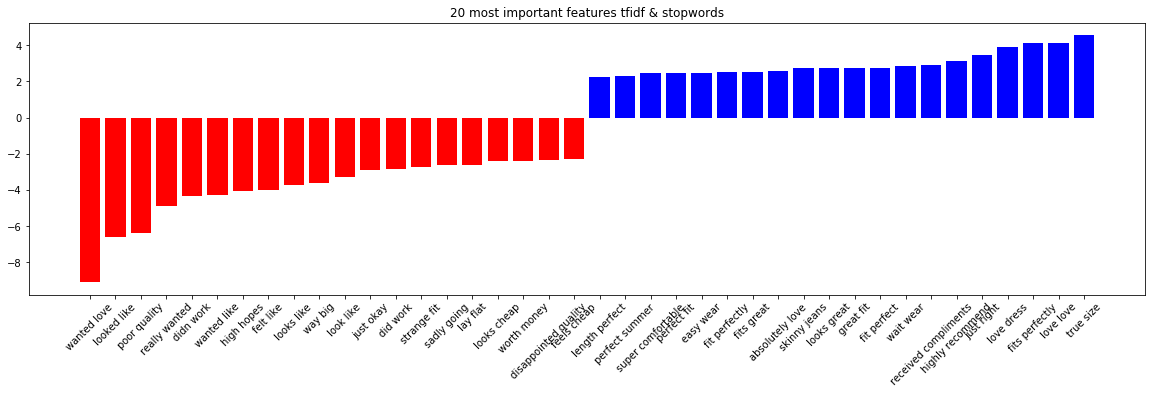

In [129]:
plot2(logreg_tfidf22_sw.coef_[0],feature_names_tfidf22_sw,'tfidf & stopwords')

In [130]:
tfidf12 = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X_train_tfidf12_sw = tfidf12.fit_transform(train3_clean['text'])
y_train_tfidf12_sw = train3_clean['Recommended']
X_test_tfidf12_sw = tfidf12.transform(test3_clean['text'])
y_test_tfidf12_sw = test3_clean['Recommended']
feature_names_tfidf12_sw = tfidf12.get_feature_names()
logreg_tfidf12_sw = LogisticRegressionCV(scoring = 'average_precision')
logreg_tfidf12_sw.fit(X_train_tfidf12_sw,y_train_tfidf12_sw)
print('test score:',logreg_tfidf12_sw.score(X_test_tfidf12_sw,y_test_tfidf12_sw))



test score: 0.9030172413793104


In [131]:
print("Test Avg Precision score: ", average_precision_score(logreg_tfidf12_sw.predict(X_test_tfidf12_sw),y_test_tfidf12_sw))
print("Test F1 score: ", f1_score(logreg_tfidf12_sw.predict(X_test_tfidf12_sw),y_test_tfidf12_sw))
print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf12_sw.predict(X_test_tfidf12_sw),y_test_tfidf12_sw))

Test Avg Precision score:  0.9592083667534457
Test F1 score:  0.9423446508648302
Test ROC AUC score:  0.8626569150766266


[-10.63530648  -5.82476746  -5.45625844  -5.16360955  -4.07661163
  -4.07470613  -3.82215894  -3.76511455  -3.27721036  -3.24204657
  -3.11446937  -2.9598487   -2.86151597  -2.79513018  -2.74807103
  -2.74659443  -2.71204069  -2.67366591  -2.64138895  -2.62045696
   2.52937123   2.53393669   2.54849345   2.54935373   2.55208042
   2.55402319   2.59033211   2.6081839    2.70727329   2.79388292
   2.82153036   2.83359976   2.85953462   2.97801301   3.0079408
   3.15376684   3.20317974   3.37427585   3.72052838   4.1053278 ]
['wanted love' 'looked like' 'really wanted' 'poor quality' 'wanted like'
 'didn work' 'pretty short' 'did work' 'way big' 'just okay'
 'great beautiful' 'lovely color' 'strange fit' 'just wasn' 'high hopes'
 'loved color' 'beautiful bright' 'great model' 'don think'
 'really looking' 'beautiful dress' 'highly recommend' 'super comfortable'
 'true size' 'long arms' 'runs large' 'cut flattering' 'good quality'
 'nice shirt' 'really love' 'like model' 'great shirt' 'rea

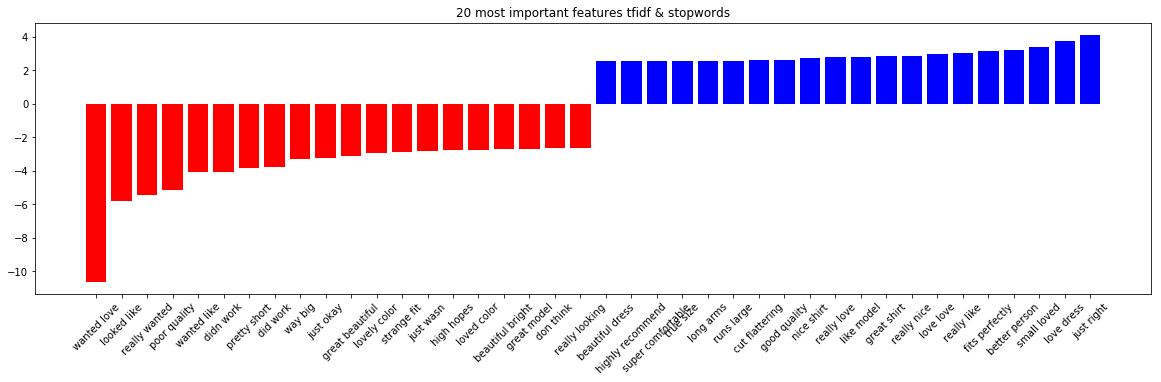

In [132]:
plot2(logreg_tfidf12_sw.coef_[0],feature_names_tfidf12_sw,'tfidf & stopwords')

In [133]:
logreg_tfidf12_sw.coef_[0]

array([ 1.63733264,  0.06763464, -0.35135369, ...,  0.07966034,
        0.06563374,  0.06563374])

In [134]:
#from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

#lectures = ["this is some food", "this is some drink"]
#vectorizer = TfidfVectorizer(ngram_range=(1,2))
#X = vectorizer.fit_transform(lectures)
features_by_gram = defaultdict(list)
for f, w in zip(feature_names_tfidf12_sw, tfidf12.idf_):
    features_by_gram[len(f.split(' '))].append((f, w))
top_n = 2
for gram, features in features_by_gram.items():
    top_features = sorted(features, key=lambda x: x[1], reverse=True)[:top_n]
    top_features = [f[0] for f in top_features]
    print('{}-gram top:'.format(gram), top_features)

1-gram top: ['03', '03dd']
2-gram top: ['00 115', '00 32b']


In [135]:
tfidf33 = TfidfVectorizer(stop_words='english', ngram_range=(3,3))

X_train_tfidf33_sw = tfidf33.fit_transform(train3_clean['text'])
y_train_tfidf33_sw = train3_clean['Recommended']
X_test_tfidf33_sw = tfidf33.transform(test3_clean['text'])
y_test_tfidf33_sw = test3_clean['Recommended']
feature_names_tfidf33_sw = tfidf33.get_feature_names()
logreg_tfidf33_sw = LogisticRegressionCV(scoring = 'average_precision')
logreg_tfidf33_sw.fit(X_train_tfidf33_sw,y_train_tfidf33_sw)
print('test score:',logreg_tfidf33_sw.score(X_test_tfidf33_sw,y_test_tfidf33_sw))



test score: 0.8186961206896551


In [136]:
print("Test Avg Precision score: ", average_precision_score(logreg_tfidf33_sw.predict(X_test_tfidf33_sw),y_test_tfidf33_sw))
print("Test F1 score: ", f1_score(logreg_tfidf33_sw.predict(X_test_tfidf33_sw),y_test_tfidf33_sw))
print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf33_sw.predict(X_test_tfidf33_sw),y_test_tfidf33_sw))

Test Avg Precision score:  0.9996818362879574
Test F1 score:  0.9003110650274033
Test ROC AUC score:  0.4094583670169766


[0.20086755 0.20686345 0.21027732 0.22085316 0.22163565 0.2323249
 0.23450836 0.23543841 0.24699295 0.26009575 0.26057142 0.26495953
 0.26547123 0.27835302 0.29448969 0.38472309 0.41548117 0.4384225
 0.81346015 0.83421437]
['runs little big', 'small fit perfectly', 'does run little', 'absolutely love dress', 'fits like glove', 'perfect summer dress', 'looks better person', 'great skinny jeans', 'wish came colors', 'size fits perfectly', 'does run large', 'compliments time wear', 'small fits perfectly', 'love love dress', 'looks great jeans', 'fit true size', 'dress love dress', 'runs true size', 'fits true size', 'love love love']
[-1.26736424 -0.96579876 -0.92382039 -0.61248488 -0.49709662 -0.42257891
 -0.40101257 -0.35873718 -0.3457928  -0.33656492 -0.31801606 -0.31525515
 -0.3013658  -0.29751514 -0.2962746  -0.28943355 -0.28472856 -0.27827799
 -0.2779919  -0.2779919 ]
['really wanted love', 'wanted love dress', 'really wanted like', 'just didn work', 'just wasn flattering', 'looks g

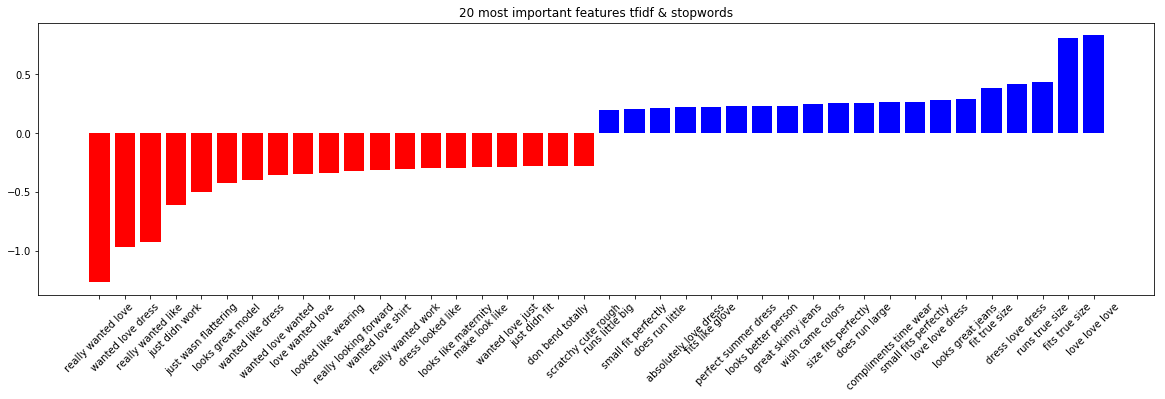

In [137]:
plot(logreg_tfidf33_sw.coef_[0],feature_names_tfidf33_sw,'tfidf & stopwords')

[-1.26736424 -0.96579876 -0.92382039 -0.61248488 -0.49709662 -0.42257891
 -0.40101257 -0.35873718 -0.3457928  -0.33656492 -0.31801606 -0.31525515
 -0.3013658  -0.29751514 -0.2962746  -0.28943355 -0.28472856 -0.27827799
 -0.2779919  -0.2779919   0.20086755  0.20686345  0.21027732  0.22085316
  0.22163565  0.2323249   0.23450836  0.23543841  0.24699295  0.26009575
  0.26057142  0.26495953  0.26547123  0.27835302  0.29448969  0.38472309
  0.41548117  0.4384225   0.81346015  0.83421437]
['really wanted love' 'wanted love dress' 'really wanted like'
 'just didn work' 'just wasn flattering' 'looks great model'
 'wanted like dress' 'wanted love wanted' 'love wanted love'
 'looked like wearing' 'really looking forward' 'wanted love shirt'
 'really wanted work' 'dress looked like' 'looks like maternity'
 'make look like' 'wanted love just' 'just didn fit' 'don bend totally'
 'scratchy cute rough' 'runs little big' 'small fit perfectly'
 'does run little' 'absolutely love dress' 'fits like glove

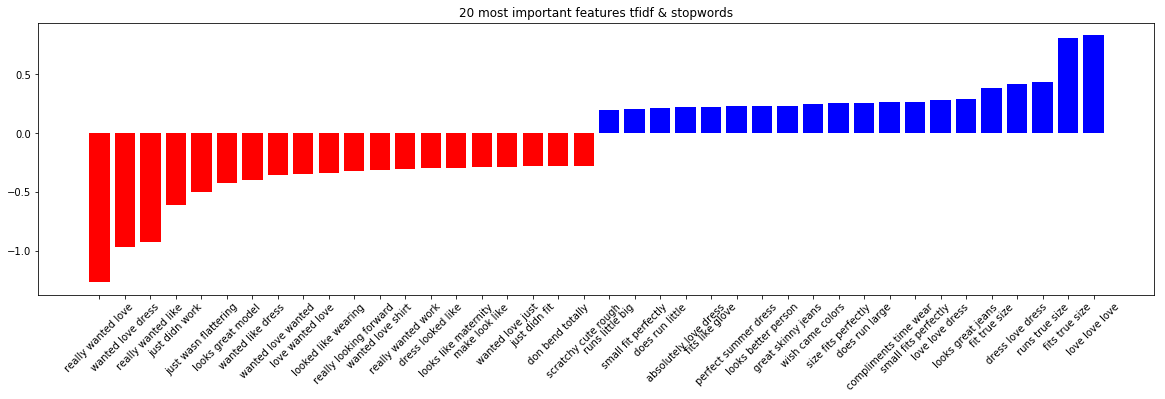

In [138]:
plot2(logreg_tfidf33_sw.coef_[0],feature_names_tfidf33_sw,'tfidf & stopwords')

In [139]:
tfidf23 = TfidfVectorizer(stop_words='english', ngram_range=(2,3))

X_train_tfidf23_sw = tfidf23.fit_transform(train3_clean['text'])
y_train_tfidf23_sw = train3_clean['Recommended']
X_test_tfidf23_sw = tfidf23.transform(test3_clean['text'])
y_test_tfidf23_sw = test3_clean['Recommended']
feature_names_tfidf23_sw = tfidf23.get_feature_names()
logreg_tfidf23_sw = LogisticRegressionCV(scoring = 'average_precision')
logreg_tfidf23_sw.fit(X_train_tfidf23_sw,y_train_tfidf23_sw)
print('test score:',logreg_tfidf23_sw.score(X_test_tfidf23_sw,y_test_tfidf23_sw))



test score: 0.8585668103448276


In [140]:
print("Test Avg Precision score: ", average_precision_score(logreg_tfidf23_sw.predict(X_test_tfidf23_sw),y_test_tfidf23_sw))
print("Test F1 score: ", f1_score(logreg_tfidf23_sw.predict(X_test_tfidf23_sw),y_test_tfidf23_sw))
print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf23_sw.predict(X_test_tfidf23_sw),y_test_tfidf23_sw))

Test Avg Precision score:  0.9739109959605852
Test F1 score:  0.9190938511326862
Test ROC AUC score:  0.822033057468578


[ 6.00750653  6.06670236  6.25503028  6.27032851  6.42979012  6.48058802
  6.52943854  6.6215752   7.00877387  7.02238418  7.04208556  7.41010536
  7.41945961  7.48778381  7.98690844  8.90286858  9.49226458 10.42112422
 10.61589474 10.91022936]
['length perfect', 'perfect summer', 'fit perfectly', 'easy wear', 'perfect fit', 'super comfortable', 'fits great', 'absolutely love', 'skinny jeans', 'looks great', 'great fit', 'fit perfect', 'wait wear', 'received compliments', 'highly recommend', 'just right', 'love love', 'love dress', 'fits perfectly', 'true size']
[-24.75983906 -18.68392652 -18.6828967  -12.44192855 -12.35150784
 -11.80883299 -11.51409968 -11.38521547 -10.50615739 -10.44229955
  -8.85879252  -8.47412794  -8.23781198  -8.13319489  -7.85474508
  -7.5988844   -7.09755454  -7.08502764  -6.88291749  -6.65182515]
['wanted love', 'poor quality', 'looked like', 'really wanted', 'didn work', 'high hopes', 'wanted like', 'felt like', 'way big', 'looks like', 'look like', 'just oka

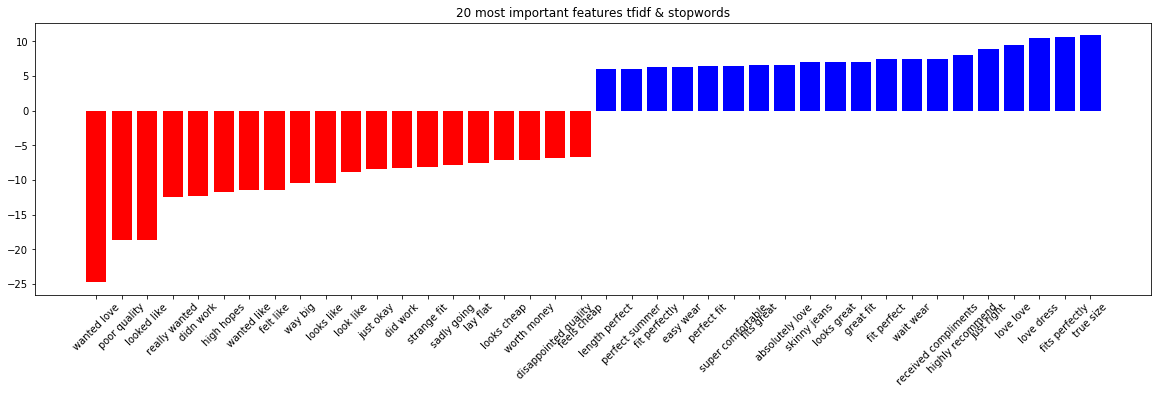

In [141]:
plot(logreg_tfidf23_sw.coef_[0],feature_names_tfidf23_sw,'tfidf & stopwords')

[-24.75983906 -18.68392652 -18.6828967  -12.44192855 -12.35150784
 -11.80883299 -11.51409968 -11.38521547 -10.50615739 -10.44229955
  -8.85879252  -8.47412794  -8.23781198  -8.13319489  -7.85474508
  -7.5988844   -7.09755454  -7.08502764  -6.88291749  -6.65182515
   6.00750653   6.06670236   6.25503028   6.27032851   6.42979012
   6.48058802   6.52943854   6.6215752    7.00877387   7.02238418
   7.04208556   7.41010536   7.41945961   7.48778381   7.98690844
   8.90286858   9.49226458  10.42112422  10.61589474  10.91022936]
['wanted love' 'poor quality' 'looked like' 'really wanted' 'didn work'
 'high hopes' 'wanted like' 'felt like' 'way big' 'looks like' 'look like'
 'just okay' 'did work' 'strange fit' 'sadly going' 'lay flat'
 'looks cheap' 'worth money' 'disappointed quality' 'feels cheap'
 'length perfect' 'perfect summer' 'fit perfectly' 'easy wear'
 'perfect fit' 'super comfortable' 'fits great' 'absolutely love'
 'skinny jeans' 'looks great' 'great fit' 'fit perfect' 'wait wear

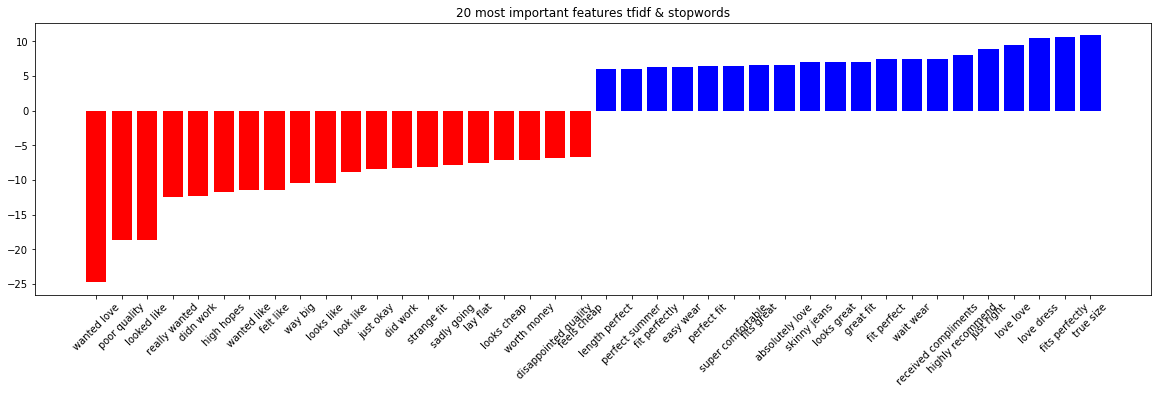

In [142]:
plot2(logreg_tfidf23_sw.coef_[0],feature_names_tfidf23_sw,'tfidf & stopwords')

test score: 0.9057112068965517
Test Avg Precision score:  0.9570797164104144
Test F1 score:  0.9437299035369775
Test ROC AUC score:  0.8627937768950679
[11.24327535 11.39810507 12.18171986 12.70697839 12.71551913 12.87885118
 13.02517123 13.07690816 13.31125371 13.33772184 13.76223402 13.8816734
 14.13753918 17.29884496 17.4904768  18.47811239 19.23774822 23.38761433
 24.54644819 29.16827641]
['jeans', 'casual', 'compliments', 'lovely', 'size', 'gorgeous', 'amazing', 'comfy', 'fun', 'bit', 'fits', 'beautiful', 'nice', 'soft', 'unique', 'little', 'comfortable', 'great', 'perfect', 'love']
[-31.33846309 -23.11087599 -22.11992652 -21.76884755 -21.34474147
 -19.87737463 -18.93105785 -18.63233618 -17.51946292 -16.06877568
 -15.72896893 -15.71808386 -15.53985633 -14.90842208 -14.7577275
 -14.36166575 -14.29351742 -13.76987297 -12.89600399 -12.86291701]
['disappointed', 'unflattering', 'wanted love', 'cheap', 'returned', 'huge', 'unfortunately', 'returning', 'poor', 'return', 'bad', 'wanted',

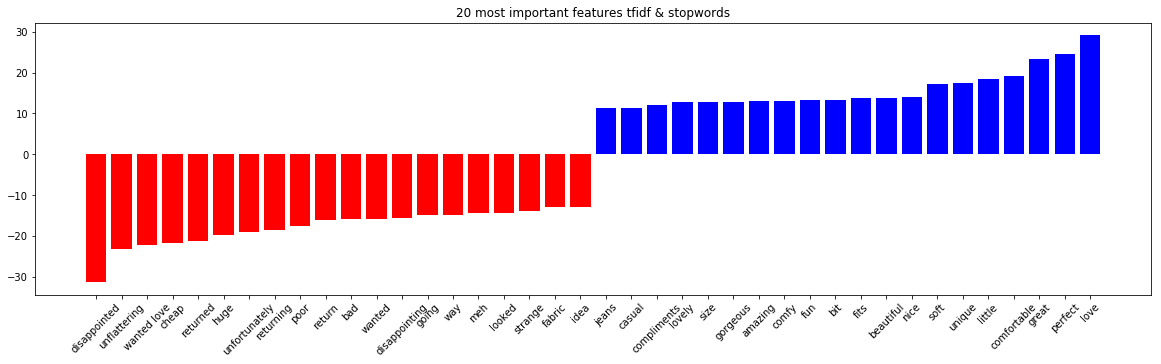

In [143]:
tfidf13 = TfidfVectorizer(stop_words='english', ngram_range=(1,3))

X_train_tfidf13_sw = tfidf13.fit_transform(train3_clean['text'])
y_train_tfidf13_sw = train3_clean['Recommended']
X_test_tfidf13_sw = tfidf13.transform(test3_clean['text'])
y_test_tfidf13_sw = test3_clean['Recommended']
feature_names_tfidf13_sw = tfidf13.get_feature_names()
logreg_tfidf13_sw = LogisticRegressionCV(scoring = 'average_precision')
logreg_tfidf13_sw.fit(X_train_tfidf13_sw,y_train_tfidf13_sw)
print('test score:',logreg_tfidf13_sw.score(X_test_tfidf13_sw,y_test_tfidf13_sw))

print("Test Avg Precision score: ", average_precision_score(logreg_tfidf13_sw.predict(X_test_tfidf13_sw),y_test_tfidf13_sw))
print("Test F1 score: ", f1_score(logreg_tfidf13_sw.predict(X_test_tfidf13_sw),y_test_tfidf13_sw))
print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf13_sw.predict(X_test_tfidf13_sw),y_test_tfidf13_sw))


plot(logreg_tfidf13_sw.coef_[0],feature_names_tfidf13_sw,'tfidf & stopwords')

[-22.11992652 -12.28609722 -11.09864099 -10.99391134  -9.38864319
  -8.12196409  -7.25930627  -7.06406119  -6.72642667  -6.6973073
  -6.48526712  -6.17813735  -5.45162749  -5.42579306  -5.31652984
  -5.21941358  -5.14783521  -5.10973939  -5.04197449  -5.01735407
   4.66934114   4.69920464   4.74810238   4.84164195   4.84355671
   4.86478628   4.946103     4.98640895   5.07191478   5.09101472
   5.25258389   5.30413259   5.35877287   5.62321419   5.81992873
   6.00777748   6.13259506   6.35328431   7.54509104   7.81171625]
['wanted love' 'looked like' 'poor quality' 'really wanted' 'didn work'
 'wanted like' 'did work' 'way big' 'pretty short' 'just okay'
 'high hopes' 'strange fit' 'looks like' 'loved color' 'felt like'
 'don think' 'lovely color' 'nice design' 'did fit' 'just wasn'
 'super flattering' 'cut flattering' 'highly recommend'
 'super comfortable' 'high quality' 'fit perfectly' 'runs large'
 'good quality' 'love love' 'true size' 'like model' 'really love'
 'great shirt' 're

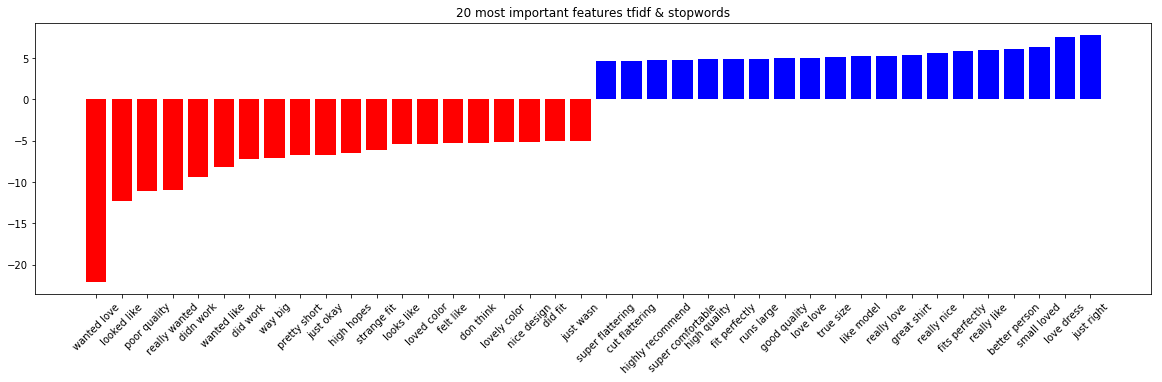

In [144]:
plot2(logreg_tfidf13_sw.coef_[0],feature_names_tfidf13_sw,'tfidf & stopwords')

(3,3) gives best performance


#### 3.2 Running character n-grams


test score: 0.9014008620689655
Test Avg Precision score:  0.9562919144219442
Test F1 score:  0.9412708600770218
Test ROC AUC score:  0.8565452091767881
[2.53052731 2.53310008 2.55677928 2.59974283 2.62195498 2.71146871
 2.7316201  2.75229777 2.80457439 2.85595595 2.98642005 3.11602415
 3.14240632 3.15298277 3.17019775 3.35715405 3.39330465 3.53509665
 4.01767067 4.34701679]
['ve ', 'nic', 'bit', 'sof', 'itt', 'niq', 'per', ' ca', 't! ', 'eat', 'rfe', 'ove', 'gre', 'un ', 'oft', ' so', ' gr', 'erf', ' i ', 'lov']
[-4.27013525 -3.7677854  -3.71726783 -3.69709789 -3.69218486 -3.67940523
 -3.56765453 -3.54734184 -3.40760836 -3.37736548 -3.342601   -3.25866199
 -3.24574335 -3.15628279 -2.89755125 -2.88835564 -2.86697043 -2.86163548
 -2.85579532 -2.85293014]
['unf', ' no', 'etu', 'eap', 'nfl', 'oor', 'urn', ' wa', 'uge', 'hea', 'was', 'nte', 'oin', 'not', 'ted', ' un', 'ete', 'ed ', 'sac', 'oke']
[-4.27013525 -3.7677854  -3.71726783 -3.69709789 -3.69218486 -3.67940523
 -3.56765453 -3.5473418

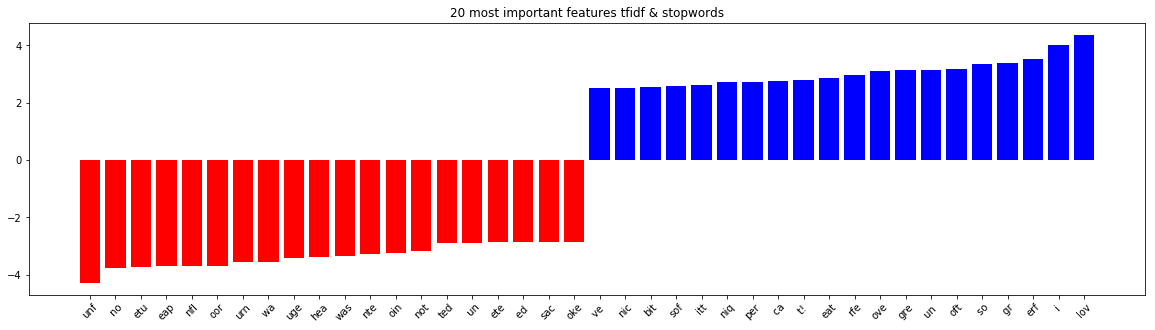

In [146]:
tfidf33_chr = TfidfVectorizer(stop_words='english', ngram_range=(3,3),analyzer="char_wb")

X_train_tfidf33_chr_sw = tfidf33_chr.fit_transform(train3_clean['text'])
y_train_tfidf33_chr_sw = train3_clean['Recommended']
X_test_tfidf33_chr_sw = tfidf33_chr.transform(test3_clean['text'])
y_test_tfidf33_chr_sw = test3_clean['Recommended']
feature_names_tfidf33_chr_sw = tfidf33_chr.get_feature_names()
logreg_tfidf33_chr_sw = LogisticRegressionCV(scoring = 'average_precision')
logreg_tfidf33_chr_sw.fit(X_train_tfidf33_chr_sw,y_train_tfidf33_chr_sw)
print('test score:',logreg_tfidf33_chr_sw.score(X_test_tfidf33_chr_sw,y_test_tfidf33_chr_sw))

print("Test Avg Precision score: ", average_precision_score(logreg_tfidf33_chr_sw.predict(X_test_tfidf33_chr_sw),y_test_tfidf33_chr_sw))
print("Test F1 score: ", f1_score(logreg_tfidf33_chr_sw.predict(X_test_tfidf33_chr_sw),y_test_tfidf33_chr_sw))
print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf33_chr_sw.predict(X_test_tfidf33_chr_sw),y_test_tfidf33_chr_sw))


plot(logreg_tfidf33_chr_sw.coef_[0],feature_names_tfidf33_chr_sw,'tfidf & stopwords')

test score: 0.9046336206896551
Test Avg Precision score:  0.9579889869658471
Test F1 score:  0.9431781701444624
Test ROC AUC score:  0.8628004179728319
[2.46981181 2.53559667 2.56868465 2.56883391 2.62184046 2.63859558
 2.66269087 2.67087645 2.78161083 2.78565153 2.82615422 2.84550541
 3.046435   3.1374933  3.26603105 3.31881261 3.32526686 3.64329806
 3.90018132 4.5005766 ]
['iqu', 'wit', 'omf', 'com', ' so', 'ice', 'niq', 'o i', 'sof', 'nic', 'per', ' i ', 'un ', 'rfe', 'ove', 'oft', 'eat', 'erf', 'gre', 'lov']
[-4.28851862 -4.05159075 -3.93020882 -3.83698236 -3.76764203 -3.73837792
 -3.67559517 -3.55621692 -3.55229863 -3.52596271 -3.43229538 -3.35942312
 -3.04770347 -2.91623857 -2.89393619 -2.75694647 -2.73503354 -2.71735937
 -2.69361641 -2.67778932]
['unf', 'not', 'etu', 'nfl', 'o l', 'urn', 'eap', 'oor', 'uge', 'oin', 'was', 'hea', 'nte', ' wa', 'ck.', 'ted', ' un', 'sac', 'oke', 'ete']
[-4.28851862 -4.05159075 -3.93020882 -3.83698236 -3.76764203 -3.73837792
 -3.67559517 -3.5562169

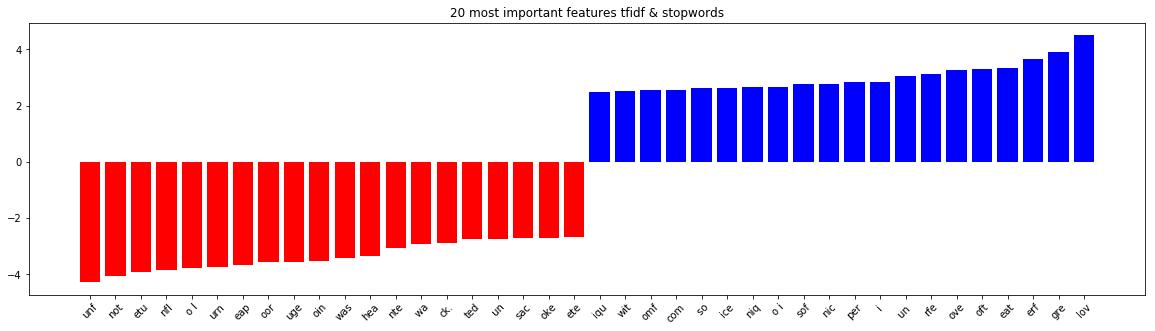

In [147]:
tfidf33_chr = TfidfVectorizer(stop_words='english', ngram_range=(3,3),analyzer="char")

X_train_tfidf33_chr_sw = tfidf33_chr.fit_transform(train3_clean['text'])
y_train_tfidf33_chr_sw = train3_clean['Recommended']
X_test_tfidf33_chr_sw = tfidf33_chr.transform(test3_clean['text'])
y_test_tfidf33_chr_sw = test3_clean['Recommended']
feature_names_tfidf33_chr_sw = tfidf33_chr.get_feature_names()
logreg_tfidf33_chr_sw = LogisticRegressionCV(scoring = 'average_precision')
logreg_tfidf33_chr_sw.fit(X_train_tfidf33_chr_sw,y_train_tfidf33_chr_sw)
print('test score:',logreg_tfidf33_chr_sw.score(X_test_tfidf33_chr_sw,y_test_tfidf33_chr_sw))

print("Test Avg Precision score: ", average_precision_score(logreg_tfidf33_chr_sw.predict(X_test_tfidf33_chr_sw),y_test_tfidf33_chr_sw))
print("Test F1 score: ", f1_score(logreg_tfidf33_chr_sw.predict(X_test_tfidf33_chr_sw),y_test_tfidf33_chr_sw))
print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf33_chr_sw.predict(X_test_tfidf33_chr_sw),y_test_tfidf33_chr_sw))


plot(logreg_tfidf33_chr_sw.coef_[0],feature_names_tfidf33_chr_sw,'tfidf & stopwords')

#### 3.3 Use of min-df and stop words

In [148]:
feature_count_tfidf_cv = []
test_scores_tfidf_cv = []
#default params and tfidf
for i in range(1,11):
    tfidf = TfidfVectorizer( ngram_range=(2,2),analyzer="char")
    X_train = tfidf.fit_transform(train3_clean['text'])
    y_train = train3_clean['Recommended']
    X_test = tfidf.transform(test3_clean['text'])
    y_test = test3_clean['Recommended']
    feature_names = tfidf.get_feature_names() 
    feature_count_tfidf_cv.append(len(feature_names))
    logreg = LogisticRegressionCV(scoring = 'average_precision')
    logreg.fit(X_train,y_train)
    test_scores_tfidf_cv.append(average_precision_score(logreg.predict(X_test),y_test))

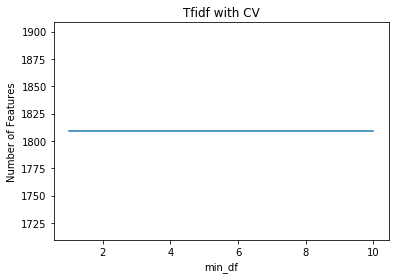

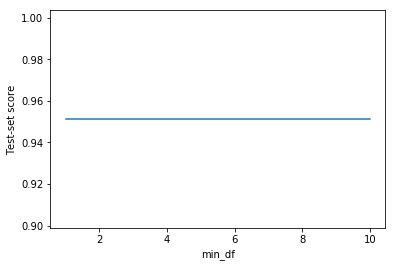

In [155]:
min_df(feature_count_tfidf_cv,test_scores_tfidf_cv,'Tfidf with CV')

##### From average precision score and roc auc we observe that tfidf with 3,3 n grams i.e using 3 gram
features alone we ge the best results Also, for the best model case the number of features after
using stop words reduces from ~388k to ~353k which is a 9% reduction with a very slight drop
(2%) in average precision score.
For the min-df case we observe that combinations of n grams are not very likely to reappear.
THus the number of features does not vary accross different values of min-df. However, the
number of features drastically reduces from to 156k to 1.8k

##### Now evaluating the best performing model on the main test set. In this case the best per-
forming model on the basis of average_precision and roc_auc is 3,3 n gram with tfidf

In [156]:
tfidf33 = TfidfVectorizer(ngram_range=(3,3))
X_train_tfidf33_sw = tfidf33.fit_transform(train3_clean['text'])
y_train_tfidf33_sw = train3_clean['Recommended']
X_test_tfidf33_sw = tfidf33.transform(test3_clean['text'])
y_test_tfidf33_sw = test3_clean['Recommended']
feature_names_tfidf33_sw = tfidf33.get_feature_names()
logreg_tfidf33_sw = LogisticRegressionCV(scoring = 'average_precision')
logreg_tfidf33_sw.fit(X_train_tfidf33_sw,y_train_tfidf33_sw)
print('test score:',logreg_tfidf33_sw.score(X_test_tfidf33_sw,y_test_tfidf33_sw))

test score: 0.8671875


In [157]:
X_test_4 = tfidf33.transform(test_main_clean["text"])
print("Test Avg Precision score: ", average_precision_score(logreg_tfidf33_sw.predict(X_test_4),test_main_clean["Recommended"]))
print("Test F1 score: ", f1_score(logreg_tfidf33_sw.predict(X_test_4),test_main_clean["Recommended"]))
print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf33_sw.predict(X_test_4),test_main_clean["Recommended"]))

Test Avg Precision score:  0.974961758111206
Test F1 score:  0.9211356466876972
Test ROC AUC score:  0.8378442040088884


# Task 4

test score: 0.9014008620689655
Test Avg Precision score:  0.9562919144219442
Test F1 score:  0.9412708600770218
Test ROC AUC score:  0.8565452091767881
[2.53052731 2.53310008 2.55677928 2.59974283 2.62195498 2.71146871
 2.7316201  2.75229777 2.80457439 2.85595595 2.98642005 3.11602415
 3.14240632 3.15298277 3.17019775 3.35715405 3.39330465 3.53509665
 4.01767067 4.34701679]
['ve ', 'nic', 'bit', 'sof', 'itt', 'niq', 'per', ' ca', 't! ', 'eat', 'rfe', 'ove', 'gre', 'un ', 'oft', ' so', ' gr', 'erf', ' i ', 'lov']
[-4.27013525 -3.7677854  -3.71726783 -3.69709789 -3.69218486 -3.67940523
 -3.56765453 -3.54734184 -3.40760836 -3.37736548 -3.342601   -3.25866199
 -3.24574335 -3.15628279 -2.89755125 -2.88835564 -2.86697043 -2.86163548
 -2.85579532 -2.85293014]
['unf', ' no', 'etu', 'eap', 'nfl', 'oor', 'urn', ' wa', 'uge', 'hea', 'was', 'nte', 'oin', 'not', 'ted', ' un', 'ete', 'ed ', 'sac', 'oke']
[-4.27013525 -3.7677854  -3.71726783 -3.69709789 -3.69218486 -3.67940523
 -3.56765453 -3.5473418

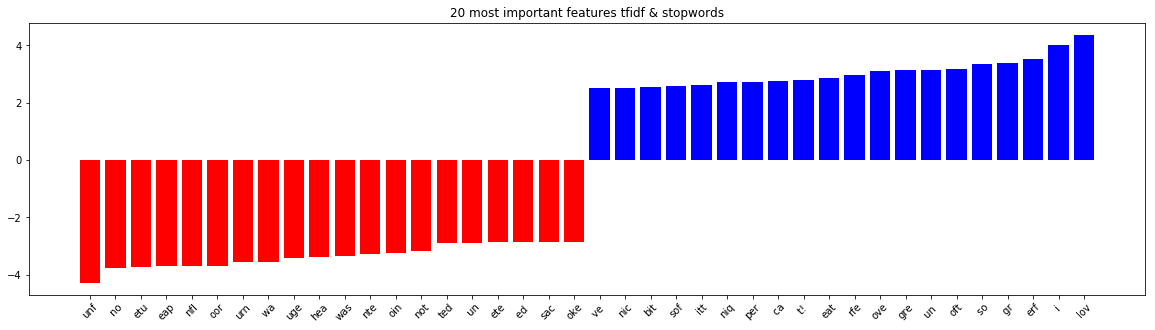

In [163]:
tfidf33_chr = TfidfVectorizer(stop_words='english', ngram_range=(3,3),analyzer="char_wb")
X_train_tfidf33_chr_sw = tfidf33_chr.fit_transform(train3_clean['text'])
y_train_tfidf33_chr_sw = train3_clean['Recommended']
X_test_tfidf33_chr_sw = tfidf33_chr.transform(test3_clean['text'])
y_test_tfidf33_chr_sw = test3_clean['Recommended']
feature_names_tfidf33_chr_sw = tfidf33_chr.get_feature_names()
logreg_tfidf33_chr_sw = LogisticRegressionCV(scoring = 'average_precision')
logreg_tfidf33_chr_sw.fit(X_train_tfidf33_chr_sw,y_train_tfidf33_chr_sw)
print('test score:',logreg_tfidf33_chr_sw.score(X_test_tfidf33_chr_sw,y_test_tfidf33_chr_sw))
print("Test Avg Precision score: ", average_precision_score(logreg_tfidf33_chr_sw.predict(X_test_tfidf33_chr_sw),y_test_tfidf33_chr_sw))
print("Test F1 score: ", f1_score(logreg_tfidf33_chr_sw.predict(X_test_tfidf33_chr_sw),y_test_tfidf33_chr_sw))
print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf33_chr_sw.predict(X_test_tfidf33_chr_sw),y_test_tfidf33_chr_sw))
plot(logreg_tfidf33_chr_sw.coef_[0],feature_names_tfidf33_chr_sw,'tfidf & stopwords')

In [164]:
top20_names = ['really wanted love' ,'wanted love dress' ,'really wanted like',
'just didn work', 'just wasn flattering' ,'looks great model',
'looked like wearing', 'wanted like dress' ,'really looking forward',
'wanted love wanted' ,'love wanted love', 'looked like sack',
'looked like maternity', 'wanted love just' ,'really wanted work',
'looks like maternity' ,'dress looked like' ,'felt like wearing',
'like maternity dress', 'wanted love really' ,'dress bought dress',
'looks better person' ,'small fit perfectly', 'great skinny jeans',
'runs little big', 'fits like glove', 'absolutely love dress',
'wish came colors' ,'compliments time wear' ,'does run large',
'size fits perfectly', 'perfect summer dress' ,'love love dress',
'small fits perfectly', 'looks great jeans', 'fit true size',
'dress love dress', 'runs true size', 'fits true size' ,'love love love']

In [165]:
voc = " ".join(top20_names)

##### 3,3 is the best performing model. THerefore, here we train the model on only on the top 20
features. Thus the training value will have

In [166]:
tfidf33_chr = TfidfVectorizer(stop_words='english', ngram_range=(3,3))
tfidf33_chr.fit(top20_names)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(3, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [172]:
X_train_tfidf33_chr_sw = tfidf33_chr.transform(train3_clean['text'])
y_train_tfidf33_chr_sw = train3_clean['Recommended']
X_test_tfidf33_chr_sw = tfidf33_chr.transform(test3_clean['text'])
y_test_tfidf33_chr_sw = test3_clean['Recommended']
feature_names_tfidf33_chr_sw = tfidf33_chr.get_feature_names()
logreg_tfidf33_chr_sw = LogisticRegressionCV(scoring = 'average_precision')
logreg_tfidf33_chr_sw.fit(X_train_tfidf33_chr_sw,y_train_tfidf33_chr_sw)
print('test score:',logreg_tfidf33_chr_sw.score(X_test_tfidf33_chr_sw,y_test_tfidf33_chr_sw))
print("Test Avg Precision score: ", average_precision_score(logreg_tfidf33_chr_sw.predict(X_test_tfidf33_chr_sw),y_test_tfidf33_chr_sw))
print("Test F1 score: ", f1_score(logreg_tfidf33_chr_sw.predict(X_test_tfidf33_chr_sw), y_test_tfidf33_chr_sw))
#print("Test ROC AUC score: ", roc_auc_score(logreg_tfidf33_chr_sw.predict(logreg_tfidf33_chr_sw.predict(X_test_tfidf33_chr_sw),y_test_tfidf33_chr_sw)
#plot(logreg_tfidf33_chr_sw.coef_[0],feature_names_tfidf33_chr_sw,'tfidf & stopwords')

test score: 0.8286637931034483
Test Avg Precision score:  0.9917910741708383
Test F1 score:  0.9047904191616767


[0.65698797 1.07232126 1.24678774 1.61462635 1.80563648 1.80673304
 1.81281305 1.88408762 3.12104271 3.3084794  3.33948881 3.34119789
 3.44444106 3.48758475 3.5019485  3.53890446 3.61991553 3.78003241
 4.0038865  4.81043626]
['fit true size', 'does run large', 'small fit perfectly', 'fits true size', 'size fits perfectly', 'fits like glove', 'looks great jeans', 'runs true size', 'love love dress', 'love love love', 'runs little big', 'absolutely love dress', 'wish came colors', 'compliments time wear', 'looks better person', 'great skinny jeans', 'small fits perfectly', 'perfect summer dress', 'dress love dress', 'dress bought dress']
[-4.95016194 -3.54260424 -3.14694125 -3.02635758 -2.89853236 -2.8228469
 -2.74699388 -2.72237295 -2.69431857 -2.63047602 -2.57659331 -2.40289868
 -2.3843113  -2.07114276 -1.91225792 -1.88927351 -1.79434495 -1.72929996
 -1.24925103  0.14678142]
['looks great model', 'like maternity dress', 'wanted love wanted', 'dress looked like', 'wanted love just', 're

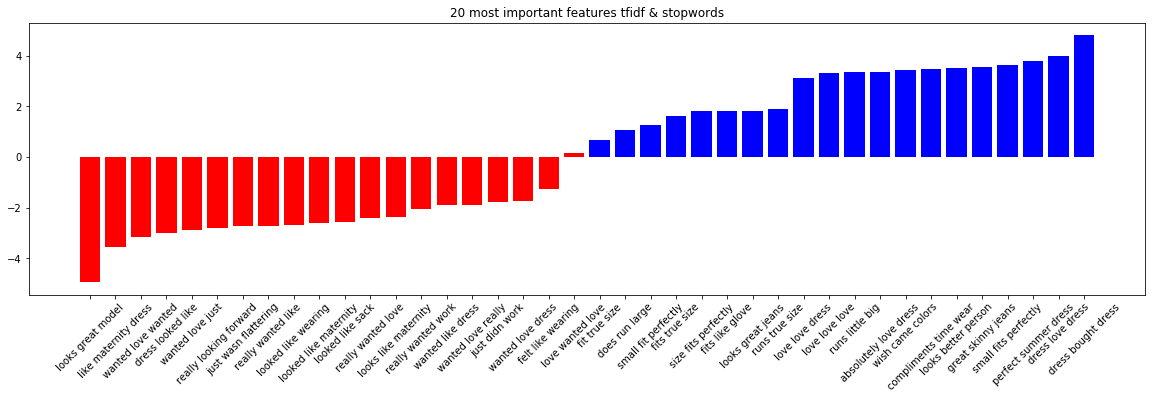

In [173]:
plot(logreg_tfidf33_chr_sw.coef_[0],feature_names_tfidf33_chr_sw,'tfidf & stopwords')

Now we train the tfidf with stop words and n_grams = (3,3) model on an svm with l1 and l2
penalties

In [174]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
svcl1 = LinearSVC(penalty='l1', dual = False)
svcl2 = LinearSVC(penalty='l2')
parameters = {'C':[0.01,0.1,0.5,1,5, 10]}
clf1 = GridSearchCV(svcl1, parameters)
clf2 = GridSearchCV(svcl2, parameters)

In [175]:
tfidf33_sw = TfidfVectorizer(stop_words='english', ngram_range=(3,3))
X_train_tfidf33_sw = tfidf33_sw.fit_transform(train3_clean['text'])
y_train_tfidf33_sw = train3_clean['Recommended']
X_test_tfidf33_sw = tfidf33_sw.transform(test3_clean['text'])
y_test_tfidf33_sw = test3_clean['Recommended']
feature_names_tfidf33_sw = tfidf33_sw.get_feature_names()
#svm_tfidf33_sw = LogisticRegressionCV(scoring = 'average_precision')
clf1.fit(X_train_tfidf33_sw,y_train_tfidf33_sw)
clf2.fit(X_train_tfidf33_sw,y_train_tfidf33_sw)
print('l1 test score:',clf1.score(X_test_tfidf33_sw,y_test_tfidf33_sw))

l1 test score: 0.822198275862069


In [178]:
print("l1 Test Avg Precision score: ", average_precision_score(clf1.predict(X_test_tfidf33_sw),y_test_tfidf33_sw))
print("l1 Test F1 score: ", f1_score(clf1.predict(X_test_tfidf33_sw),y_test_tfidf33_sw))
print("l1 Test ROC AUC score: ", roc_auc_score(clf1.predict(X_test_tfidf33_sw),y_test_tfidf33_sw))
print('l2 test score:',clf2.score(X_test_tfidf33_sw,y_test_tfidf33_sw))

l1 Test Avg Precision score:  0.9635883510563319
l1 Test F1 score:  0.8991134209721798
l1 Test ROC AUC score:  0.6841886269070735
l2 test score: 0.8302801724137931


In [179]:
print("l2 Test Avg Precision score: ", average_precision_score(clf1.predict(X_test_tfidf33_sw),y_test_tfidf33_sw))
print("l2 Test F1 score: ", f1_score(clf1.predict(X_test_tfidf33_sw),y_test_tfidf33_sw))
print("l2 Test ROC AUC score: ", roc_auc_score(clf1.predict(X_test_tfidf33_sw),y_test_tfidf33_sw))

l2 Test Avg Precision score:  0.9635883510563319
l2 Test F1 score:  0.8991134209721798
l2 Test ROC AUC score:  0.6841886269070735


##### We see that using svc with l1 and l2 penalties leads to a significant drop in performance.

We could explore: -Length of text

-Presence of Emojis

-Number of out-of-vocabularly words

-Presence / frequency of ALL CAPS

-Presence of punctuation like !

-Sentiment words (fantastic, great, amazing vs disappointing, bad, etc.)